In [1]:
from tqdm.notebook import tqdm
from urllib.parse import quote_plus
from sqlalchemy.engine import create_engine, URL
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import polars as pl
import seaborn as sns
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
from sklearn.linear_model import LogisticRegression
from tqdm.notebook import tqdm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math 
import matplotlib.pyplot as plt
import warnings
import optuna
from sklearn.metrics import accuracy_score, precision_score
import seaborn as sns
from datetime import datetime
from dotenv import load_dotenv
import json
import phik
from phik.report import plot_correlation_matrix
from phik import report
from typing import Sequence, Any
from datetime import datetime
import requests
import polars.selectors as cs
from catboost import CatBoostRanker, Pool
from matplotlib.colors import LinearSegmentedColormap
from tqdm.notebook import tqdm
from datetime import datetime, timedelta
import random
import requests
import json
import zipfile
import re
from urllib.parse import urlparse, parse_qs, urlencode, urlunparse, quote_plus
import pyarrow.parquet as pq
import bisect

# EDA

In [2]:
df = pl.read_csv('df_hack_final.csv')

In [28]:
df.head()

MEAS_DT,Cu_oreth,Ni_oreth,Ore_mass,Mass_1,Mass_2,Dens_4,Mass_4,Vol_4,Cu_4F,Ni_4F,Ni_4.1C,Ni_4.1C_max,Ni_4.1C_min,Ni_4.1T,Ni_4.1T_max,Ni_4.1T_min,FM_4.1_A,Ni_4.2C,Ni_4.2C_max,Ni_4.2C_min,Ni_4.2T,Ni_4.2T_max,Ni_4.2T_min,FM_4.2_A,Dens_5,Mass_5,Vol_5,Ni_5F,Ni_5.1C,Ni_5.1C_max,Ni_5.1C_min,Ni_5.1T,Ni_5.1T_max,Ni_5.1T_min,FM_5.1_A,Ni_5.2C,…,Cu_1.1C_min,Ni_1.1C_max,Ni_1.1C_min,Ni_1.1T_max,Ni_1.1T_min,FM_1.2_A,Cu_1.2C_max,Cu_1.2C_min,Ni_1.2C_max,Ni_1.2C_min,Ni_1.2T_max,Ni_1.2T_min,FM_2.1_A,Cu_2.1C_max,Cu_2.1C_min,Cu_2.1T_max,Cu_2.1T_min,FM_2.2_A,Cu_2.2C_max,Cu_2.2C_min,Cu_2.2T_max,Cu_2.2T_min,FM_3.1_A,Cu_3.1C_max,Cu_3.1C_min,Ni_3.1C_max,Ni_3.1C_min,Cu_3.1T_max,Cu_3.1T_min,FM_3.2_A,Cu_3.2C_max,Cu_3.2C_min,Ni_3.2C_max,Ni_3.2C_min,Cu_3.2T_max,Cu_3.2T_min,Ni_rec
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""2024-01-01 00:00:00""",2.6097,1.5313,1096.5,1240.597656,692.090942,1.342155,711.999023,1548.71875,0.6232,2.4937,4.1826,null,null,0.7136,null,null,null,3.8121,null,null,0.7602,null,null,null,1.346855,476.127625,1021.624939,3.99735,6.21,null,null,0.7943,null,null,null,6.7906,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""2024-01-01 00:15:00""",2.5548,1.4842,1123.0,1205.422363,693.616394,1.339809,710.697815,1556.5625,0.6292,2.5157,4.1037,4.7,4.5,0.7247,0.77,0.67,0.0,3.7383,4.7,4.2,0.7585,0.75,0.68,0.0,1.3427,473.042267,1027.3125,3.921,6.33,6.5,6.3,0.8009,0.75,0.68,0.0,6.642,…,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,null
"""2024-01-01 00:30:00""",2.5109,1.4355,840.0,1188.762573,698.350586,1.339792,707.198547,1548.09375,0.5941,2.5253,4.1911,4.7,4.5,0.7069,0.77,0.67,0.0,3.7132,4.7,4.2,0.7613,0.75,0.68,0.0,1.3427,472.912659,1026.9375,3.95215,6.2619,6.5,6.3,0.7829,0.75,0.68,0.0,6.5325,…,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.97017
"""2024-01-01 00:45:00""",2.4765,1.3852,824.0,1151.888672,714.678101,1.342392,707.86554,1538.875,0.6682,2.5418,4.1268,4.7,4.5,0.7097,0.77,0.67,0.0,3.7086,4.7,4.2,0.7412,0.75,0.68,0.0,1.342075,475.598877,1034.75,3.9177,6.0307,6.5,6.3,0.7576,0.75,0.68,0.0,6.7853,…,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.968639
"""2024-01-01 01:00:00""",2.3585,1.3368,0.0,1104.101318,730.190674,1.337608,700.935059,1545.1875,0.6489,2.5559,4.1805,4.7,4.5,0.7155,0.77,0.67,0.0,3.7558,4.7,4.2,0.755,0.75,0.68,0.0,1.340294,473.865509,1036.375,3.96815,6.0333,6.5,6.3,0.7486,0.75,0.68,0.0,6.7513,…,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.974205


In [223]:
df_test = pl.read_csv('test.csv')
df_test.head(2)

MEAS_DT,Ni_1.1C_min,Ni_1.1C_max,Cu_1.1C_min,Cu_1.1C_max,Ni_1.2C_min,Ni_1.2C_max,Cu_1.2C_min,Cu_1.2C_max,Cu_2.1T_min,Cu_2.1T_max,Cu_2.2T_min,Cu_2.2T_max,Cu_3.1T_min,Cu_3.1T_max,Cu_3.2T_min,Cu_3.2T_max,Ni_4.1T_min,Ni_4.1T_max,Ni_4.1C_min,Ni_4.1C_max,Ni_4.2T_min,Ni_4.2T_max,Ni_4.2C_min,Ni_4.2C_max,Ni_5.1T_min,Ni_5.1T_max,Ni_5.1C_min,Ni_5.1C_max,Ni_5.2T_min,Ni_5.2T_max,Ni_5.2C_min,Ni_5.2C_max,Ni_6.1T_min,Ni_6.1T_max,Ni_6.1C_min,Ni_6.1C_max,Ni_6.2T_min,Ni_6.2T_max,Ni_6.2C_min,Ni_6.2C_max
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""2024-01-19 12:15:00""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""2024-01-19 12:30:00""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


Рассмотрим каждый этап 

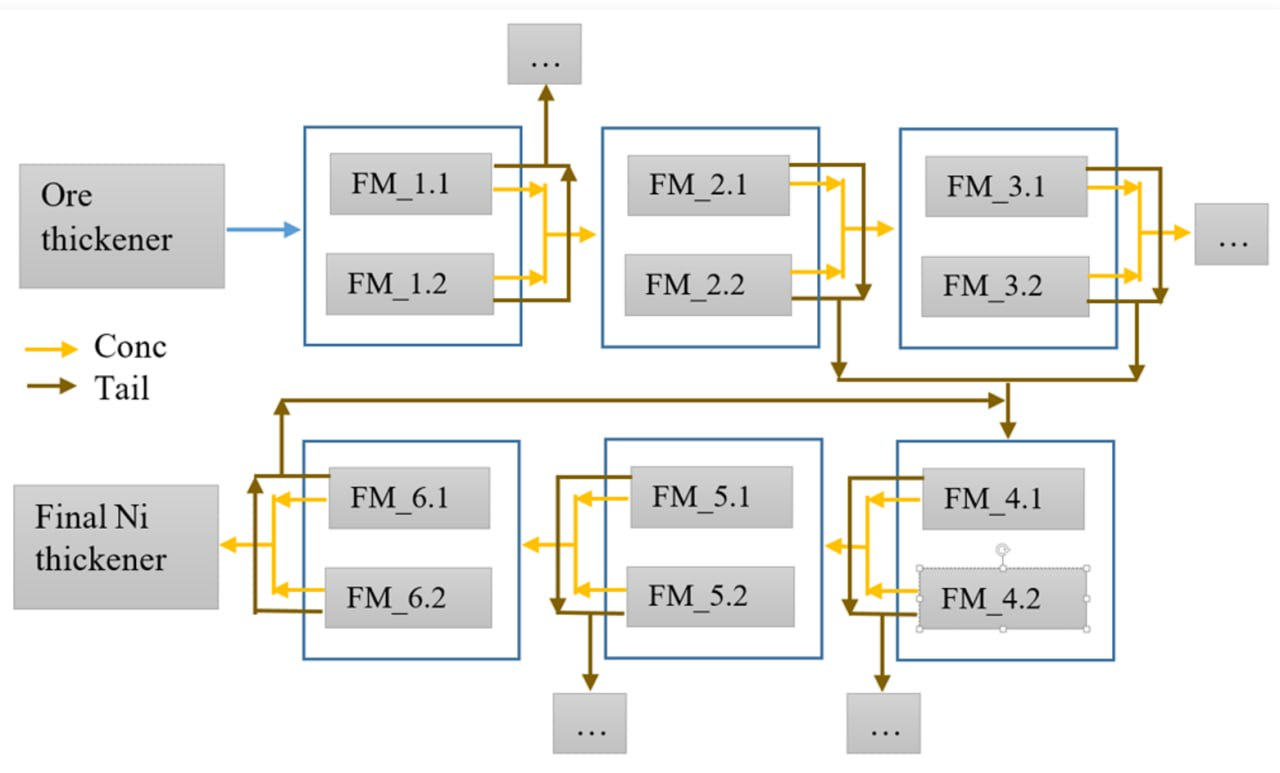

## FM_1.1

## FM_1.2

## FM_2.1

Наиболее релевантные данные с переключения полей A с 0 на 1

In [144]:
x='2.1'

In [128]:
d = df.select([cs.contains(x)] + ['MEAS_DT'])
d.head()

Cu_2.1C,Ni_2.1C,Cu_2.1T,Ni_2.1T,FM_2.1_A,Cu_2.1C_max,Cu_2.1C_min,Cu_2.1T_max,Cu_2.1T_min,MEAS_DT
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
18.0072,2.8705,0.6405,2.098,null,null,null,null,null,"""2024-01-01 00:00:00"""
18.1457,2.8092,0.674,2.0389,0.0,17.0,16.0,0.45,0.34,"""2024-01-01 00:15:00"""
16.315,2.7114,0.7055,2.0604,0.0,17.0,16.0,0.45,0.34,"""2024-01-01 00:30:00"""
13.4985,2.8692,0.6965,2.08,0.0,17.0,16.0,0.45,0.34,"""2024-01-01 00:45:00"""
13.865,2.7396,0.7043,2.0787,0.0,17.0,16.0,0.45,0.34,"""2024-01-01 01:00:00"""


In [129]:
d[f'FM_{x}_A'].value_counts()

FM_2.1_A,count
f64,u32
1.0,11357
0.0,18978
null,1


In [130]:
d = d.with_columns(flag = pl.col(f'FM_{x}_A') - pl.col(f'FM_{x}_A').shift(-1))

In [131]:
d['flag'].unique()

flag
f64
null
-1.0
0.0
1.0


In [132]:
d=d.filter(pl.col('flag')==1)
d.head()

Cu_2.1C,Ni_2.1C,Cu_2.1T,Ni_2.1T,FM_2.1_A,Cu_2.1C_max,Cu_2.1C_min,Cu_2.1T_max,Cu_2.1T_min,MEAS_DT,flag
f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
17.1472,2.4418,0.4351,2.7477,1.0,18.0,16.0,0.45,0.4,"""2024-04-22 13:45:00""",1.0
17.6223,2.3375,0.4455,2.7434,1.0,18.0,16.0,0.45,0.4,"""2024-04-24 15:00:00""",1.0
18.1346,2.3817,0.4599,2.8355,1.0,18.0,16.0,0.44,0.4,"""2024-04-24 17:30:00""",1.0
17.1751,2.3973,0.438,2.6921,1.0,17.5,16.0,0.44,0.4,"""2024-04-26 06:30:00""",1.0
15.9507,2.3099,0.4338,2.4534,1.0,17.2,16.0,0.44,0.4,"""2024-04-28 00:00:00""",1.0


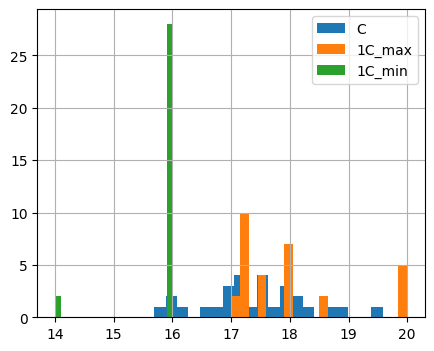

In [133]:
plt.figure(figsize=(5,4))
d[f'Cu_{x}C'].to_pandas().hist(bins=20, label='C')
d[f'Cu_{x}C_max'].to_pandas().hist(bins=20, label='1C_max')
d[f'Cu_{x}C_min'].to_pandas().hist(bins=20, label='1C_min')
plt.legend()
plt.show()

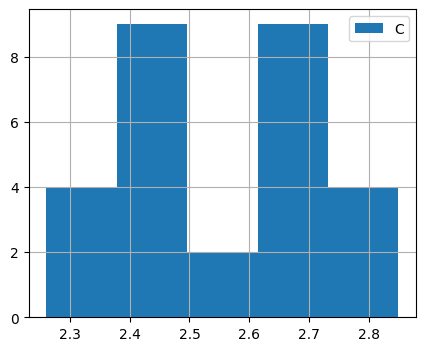

In [136]:
plt.figure(figsize=(5,4))
d[f'Ni_{x}C'].to_pandas().hist(bins=5, label='C')
plt.legend()
plt.show()

In [138]:
d = d.with_columns(((pl.col(f'Cu_{x}C_max')+pl.col(f'Cu_{x}C_min'))/2).alias(f'Cu_{x}C_mean'))
d.head()

Cu_2.1C,Ni_2.1C,Cu_2.1T,Ni_2.1T,FM_2.1_A,Cu_2.1C_max,Cu_2.1C_min,Cu_2.1T_max,Cu_2.1T_min,MEAS_DT,flag,Cu_2.1C_mean
f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64
17.1472,2.4418,0.4351,2.7477,1.0,18.0,16.0,0.45,0.4,"""2024-04-22 13:45:00""",1.0,17.0
17.6223,2.3375,0.4455,2.7434,1.0,18.0,16.0,0.45,0.4,"""2024-04-24 15:00:00""",1.0,17.0
18.1346,2.3817,0.4599,2.8355,1.0,18.0,16.0,0.44,0.4,"""2024-04-24 17:30:00""",1.0,17.0
17.1751,2.3973,0.438,2.6921,1.0,17.5,16.0,0.44,0.4,"""2024-04-26 06:30:00""",1.0,16.75
15.9507,2.3099,0.4338,2.4534,1.0,17.2,16.0,0.44,0.4,"""2024-04-28 00:00:00""",1.0,16.6


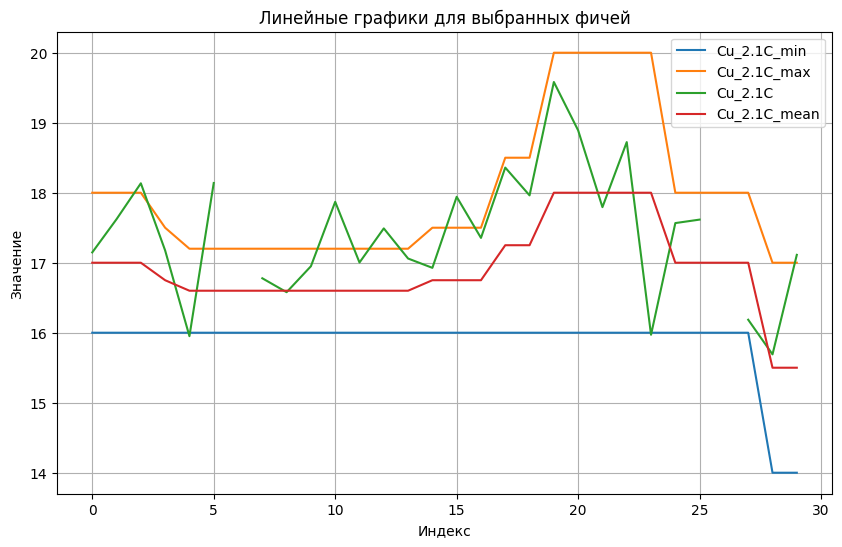

In [139]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Cu_{x}C_min'], label=f'Cu_{x}C_min')
plt.plot(summed_df[f'Cu_{x}C_max'], label=f'Cu_{x}C_max')
plt.plot(summed_df[f'Cu_{x}C'], label=f'Cu_{x}C')
plt.plot(summed_df[f'Cu_{x}C_mean'], label=f'Cu_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

In [141]:
df = df.with_columns(((pl.col(f'Cu_{x}C_max')+pl.col(f'Cu_{x}C_min'))/2).alias(f'Cu_{x}C_mean'))
summed_df = df.to_pandas()

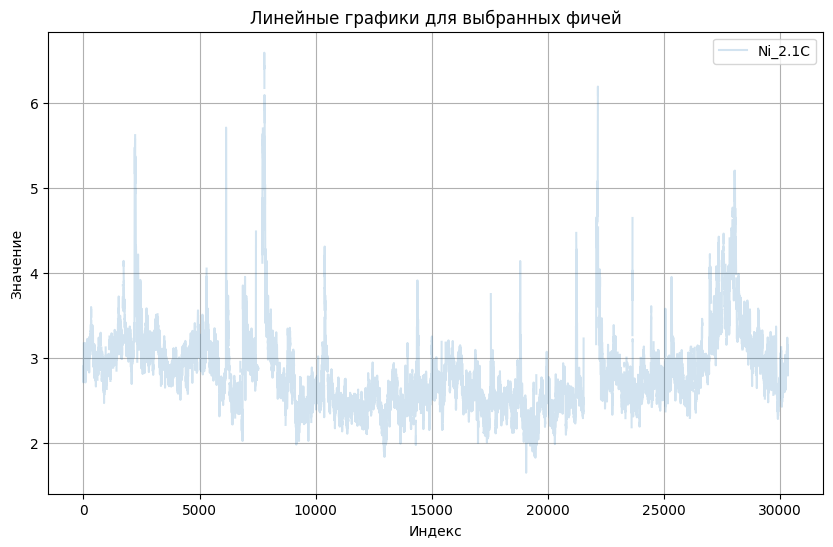

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C',alpha=.2)
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

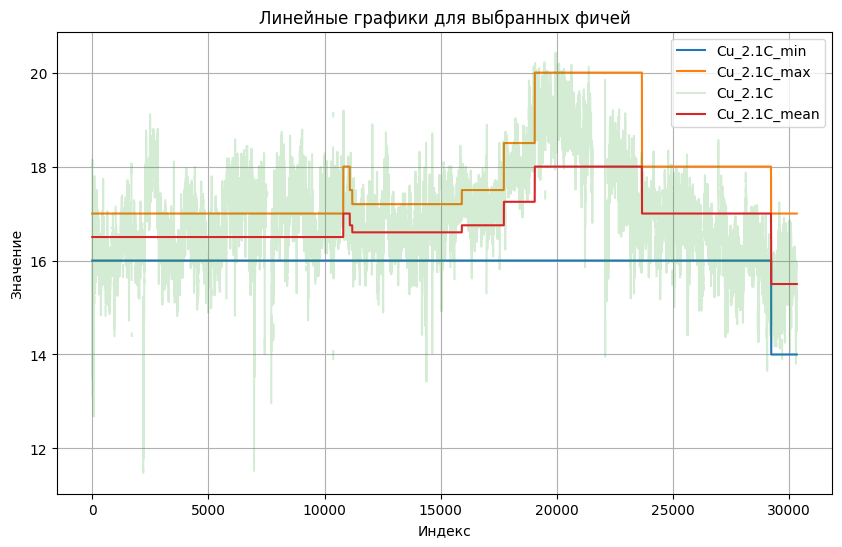

In [143]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Cu_{x}C_min'], label=f'Cu_{x}C_min')
plt.plot(summed_df[f'Cu_{x}C_max'], label=f'Cu_{x}C_max')
plt.plot(summed_df[f'Cu_{x}C'], label=f'Cu_{x}C',alpha=0.2)
plt.plot(summed_df[f'Cu_{x}C_mean'], label=f'Cu_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

## FM_2.2

Наиболее релевантные данные с переключения полей A с 0 на 1

In [145]:
x='2.2'

In [146]:
d = df.select([cs.contains(x)] + ['MEAS_DT'])
d.head()

Cu_2.2C,Ni_2.2C,Cu_2.2T,Ni_2.2T,FM_2.2_A,Cu_2.2C_max,Cu_2.2C_min,Cu_2.2T_max,Cu_2.2T_min,MEAS_DT
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
17.5073,2.5247,0.4005,2.7056,null,null,null,null,null,"""2024-01-01 00:00:00"""
17.4514,2.4793,0.3986,2.7757,0.0,17.0,16.0,0.42,0.34,"""2024-01-01 00:15:00"""
17.3994,2.4534,0.3968,2.7219,0.0,17.0,16.0,0.42,0.34,"""2024-01-01 00:30:00"""
18.0951,2.4767,0.3964,2.7827,0.0,17.0,16.0,0.42,0.34,"""2024-01-01 00:45:00"""
17.7093,2.4251,0.4,2.7358,0.0,17.0,16.0,0.42,0.34,"""2024-01-01 01:00:00"""


In [147]:
d[f'FM_{x}_A'].value_counts()

FM_2.2_A,count
f64,u32
null,1
1.0,11002
0.0,19333


In [148]:
d = d.with_columns(flag = pl.col(f'FM_{x}_A') - pl.col(f'FM_{x}_A').shift(-1))

In [149]:
d['flag'].unique()

flag
f64
null
-1.0
0.0
1.0


In [150]:
d=d.filter(pl.col('flag')==1)
d.head()

Cu_2.2C,Ni_2.2C,Cu_2.2T,Ni_2.2T,FM_2.2_A,Cu_2.2C_max,Cu_2.2C_min,Cu_2.2T_max,Cu_2.2T_min,MEAS_DT,flag
f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
15.9816,2.6451,0.403,2.8279,1.0,17.5,16.0,0.42,0.34,"""2024-04-22 13:45:00""",1.0
17.9417,2.3393,0.4701,2.8955,1.0,17.5,16.0,0.42,0.36,"""2024-04-24 17:30:00""",1.0
15.9192,2.4186,0.4186,2.8168,1.0,17.5,16.0,0.42,0.36,"""2024-04-26 06:30:00""",1.0
15.4954,2.4224,0.3997,2.7983,1.0,17.3,16.0,0.42,0.36,"""2024-04-28 00:00:00""",1.0
15.2029,2.6137,0.4576,2.6168,1.0,17.3,16.0,0.44,0.36,"""2024-05-13 14:30:00""",1.0


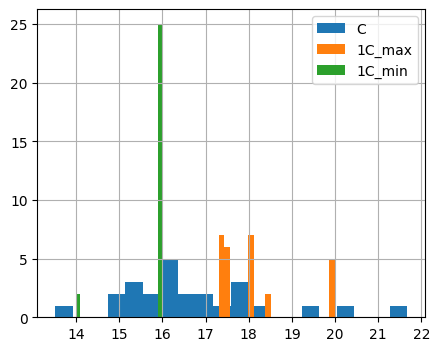

In [151]:
plt.figure(figsize=(5,4))
d[f'Cu_{x}C'].to_pandas().hist(bins=20, label='C')
d[f'Cu_{x}C_max'].to_pandas().hist(bins=20, label='1C_max')
d[f'Cu_{x}C_min'].to_pandas().hist(bins=20, label='1C_min')
plt.legend()
plt.show()

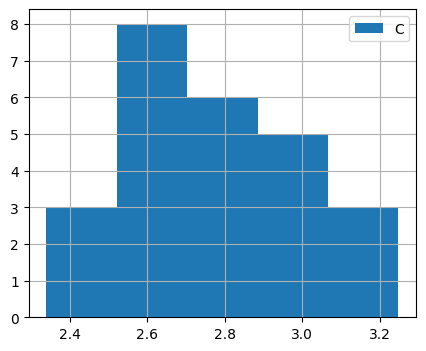

In [152]:
plt.figure(figsize=(5,4))
d[f'Ni_{x}C'].to_pandas().hist(bins=5, label='C')
plt.legend()
plt.show()

In [153]:
d = d.with_columns(((pl.col(f'Cu_{x}C_max')+pl.col(f'Cu_{x}C_min'))/2).alias(f'Cu_{x}C_mean'))
d.head()

Cu_2.2C,Ni_2.2C,Cu_2.2T,Ni_2.2T,FM_2.2_A,Cu_2.2C_max,Cu_2.2C_min,Cu_2.2T_max,Cu_2.2T_min,MEAS_DT,flag,Cu_2.2C_mean
f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64
15.9816,2.6451,0.403,2.8279,1.0,17.5,16.0,0.42,0.34,"""2024-04-22 13:45:00""",1.0,16.75
17.9417,2.3393,0.4701,2.8955,1.0,17.5,16.0,0.42,0.36,"""2024-04-24 17:30:00""",1.0,16.75
15.9192,2.4186,0.4186,2.8168,1.0,17.5,16.0,0.42,0.36,"""2024-04-26 06:30:00""",1.0,16.75
15.4954,2.4224,0.3997,2.7983,1.0,17.3,16.0,0.42,0.36,"""2024-04-28 00:00:00""",1.0,16.65
15.2029,2.6137,0.4576,2.6168,1.0,17.3,16.0,0.44,0.36,"""2024-05-13 14:30:00""",1.0,16.65


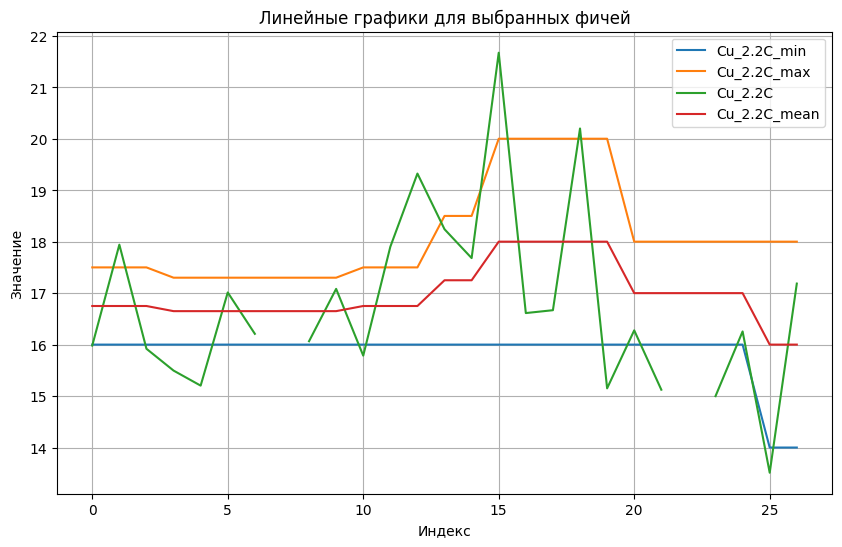

In [154]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Cu_{x}C_min'], label=f'Cu_{x}C_min')
plt.plot(summed_df[f'Cu_{x}C_max'], label=f'Cu_{x}C_max')
plt.plot(summed_df[f'Cu_{x}C'], label=f'Cu_{x}C')
plt.plot(summed_df[f'Cu_{x}C_mean'], label=f'Cu_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

In [156]:
df = df.with_columns(((pl.col(f'Cu_{x}C_max')+pl.col(f'Cu_{x}C_min'))/2).alias(f'Cu_{x}C_mean'))
summed_df = df.to_pandas()

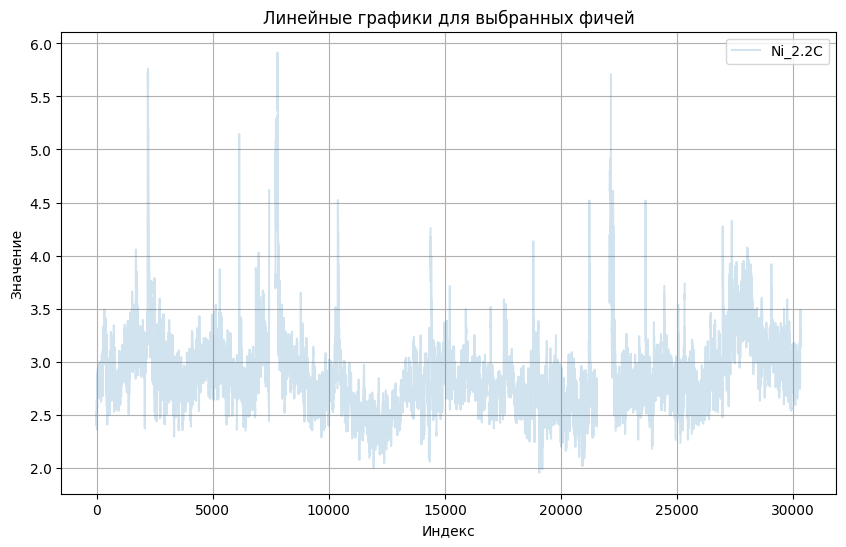

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C',alpha=.2)
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

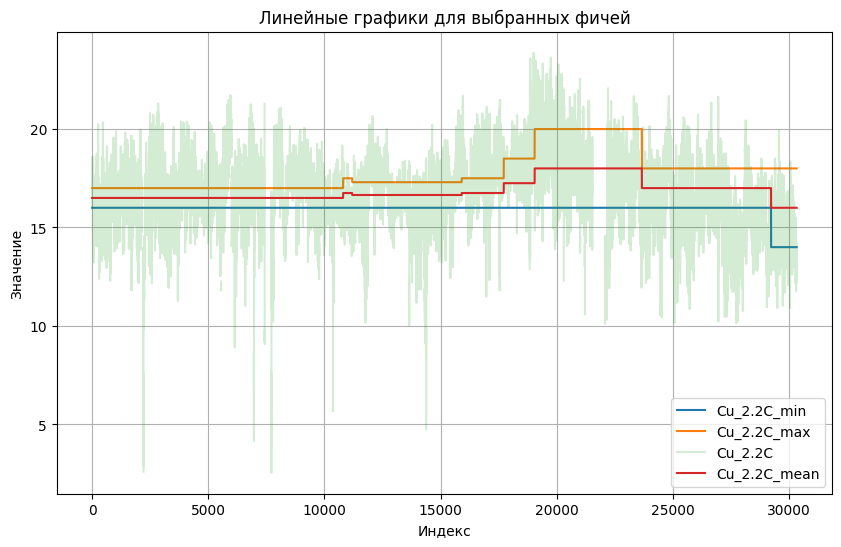

In [158]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Cu_{x}C_min'], label=f'Cu_{x}C_min')
plt.plot(summed_df[f'Cu_{x}C_max'], label=f'Cu_{x}C_max')
plt.plot(summed_df[f'Cu_{x}C'], label=f'Cu_{x}C',alpha=0.2)
plt.plot(summed_df[f'Cu_{x}C_mean'], label=f'Cu_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

## FM_3.1

Наиболее релевантные данные с переключения полей A с 0 на 1

In [159]:
x='3.1'

In [161]:
d = df.select([cs.contains(x)] + ['MEAS_DT'])
d.head()

Cu_3.1C,Ni_3.1C,Cu_3.1T,Ni_3.1T,FM_3.1_A,Cu_3.1C_max,Cu_3.1C_min,Ni_3.1C_max,Ni_3.1C_min,Cu_3.1T_max,Cu_3.1T_min,MEAS_DT
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
14.3382,2.8217,1.6723,3.9535,null,null,null,null,null,null,null,"""2024-01-01 00:00:00"""
14.1753,2.8282,1.4766,3.9686,0.0,15.5,14.5,3.9,3.7,1.0,0.8,"""2024-01-01 00:15:00"""
13.921,2.8325,1.2512,4.0164,0.0,15.5,14.5,3.9,3.7,1.0,0.8,"""2024-01-01 00:30:00"""
13.7438,2.8401,0.9814,3.9514,0.0,15.5,14.5,3.9,3.7,1.0,0.8,"""2024-01-01 00:45:00"""
13.7098,2.7849,0.8553,3.9408,0.0,15.5,14.5,3.9,3.7,1.0,0.8,"""2024-01-01 01:00:00"""


In [162]:
d[f'FM_{x}_A'].value_counts()

FM_3.1_A,count
f64,u32
0.0,19901
null,1
1.0,10434


In [163]:
d = d.with_columns(flag = pl.col(f'FM_{x}_A') - pl.col(f'FM_{x}_A').shift(-1))

In [164]:
d['flag'].unique()

flag
f64
null
-1.0
0.0
1.0


In [165]:
d=d.filter(pl.col('flag')==1)
d.head()

Cu_3.1C,Ni_3.1C,Cu_3.1T,Ni_3.1T,FM_3.1_A,Cu_3.1C_max,Cu_3.1C_min,Ni_3.1C_max,Ni_3.1C_min,Cu_3.1T_max,Cu_3.1T_min,MEAS_DT,flag
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
15.5591,2.8082,0.3602,4.596,1.0,15.5,14.0,3.9,3.7,1.0,0.8,"""2024-02-06 15:00:00""",1.0
null,null,null,null,1.0,15.5,14.0,3.9,3.7,1.0,0.8,"""2024-02-07 14:45:00""",1.0
null,null,null,null,1.0,15.5,14.0,3.9,3.7,1.0,0.8,"""2024-02-07 16:00:00""",1.0
null,null,null,null,1.0,15.5,13.0,3.9,3.7,1.2,0.8,"""2024-02-08 12:45:00""",1.0
null,null,null,null,1.0,15.5,13.0,3.9,3.7,1.4,0.8,"""2024-02-13 22:00:00""",1.0


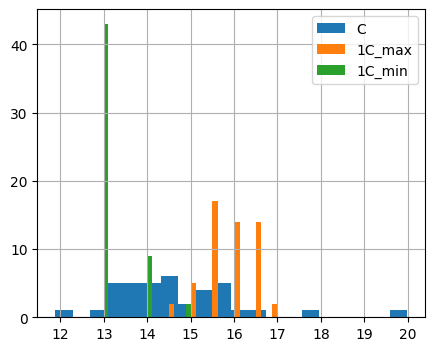

In [166]:
plt.figure(figsize=(5,4))
d[f'Cu_{x}C'].to_pandas().hist(bins=20, label='C')
d[f'Cu_{x}C_max'].to_pandas().hist(bins=20, label='1C_max')
d[f'Cu_{x}C_min'].to_pandas().hist(bins=20, label='1C_min')
plt.legend()
plt.show()

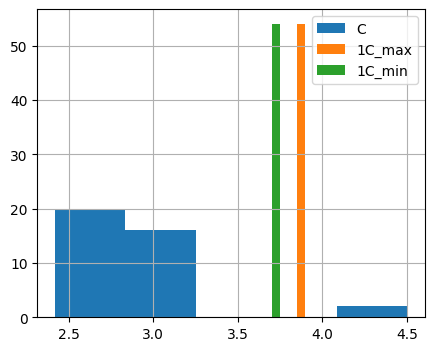

In [168]:
plt.figure(figsize=(5,4))
d[f'Ni_{x}C'].to_pandas().hist(bins=5, label='C')
d[f'Ni_{x}C_max'].to_pandas().hist(bins=20, label='1C_max')
d[f'Ni_{x}C_min'].to_pandas().hist(bins=20, label='1C_min')
plt.legend()
plt.show()

In [169]:
d = d.with_columns(((pl.col(f'Cu_{x}C_max')+pl.col(f'Cu_{x}C_min'))/2).alias(f'Cu_{x}C_mean'))
d = d.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
d.head()

Cu_3.1C,Ni_3.1C,Cu_3.1T,Ni_3.1T,FM_3.1_A,Cu_3.1C_max,Cu_3.1C_min,Ni_3.1C_max,Ni_3.1C_min,Cu_3.1T_max,Cu_3.1T_min,MEAS_DT,flag,Cu_3.1C_mean,Ni_3.1C_mean
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64
15.5591,2.8082,0.3602,4.596,1.0,15.5,14.0,3.9,3.7,1.0,0.8,"""2024-02-06 15:00:00""",1.0,14.75,3.8
null,null,null,null,1.0,15.5,14.0,3.9,3.7,1.0,0.8,"""2024-02-07 14:45:00""",1.0,14.75,3.8
null,null,null,null,1.0,15.5,14.0,3.9,3.7,1.0,0.8,"""2024-02-07 16:00:00""",1.0,14.75,3.8
null,null,null,null,1.0,15.5,13.0,3.9,3.7,1.2,0.8,"""2024-02-08 12:45:00""",1.0,14.25,3.8
null,null,null,null,1.0,15.5,13.0,3.9,3.7,1.4,0.8,"""2024-02-13 22:00:00""",1.0,14.25,3.8


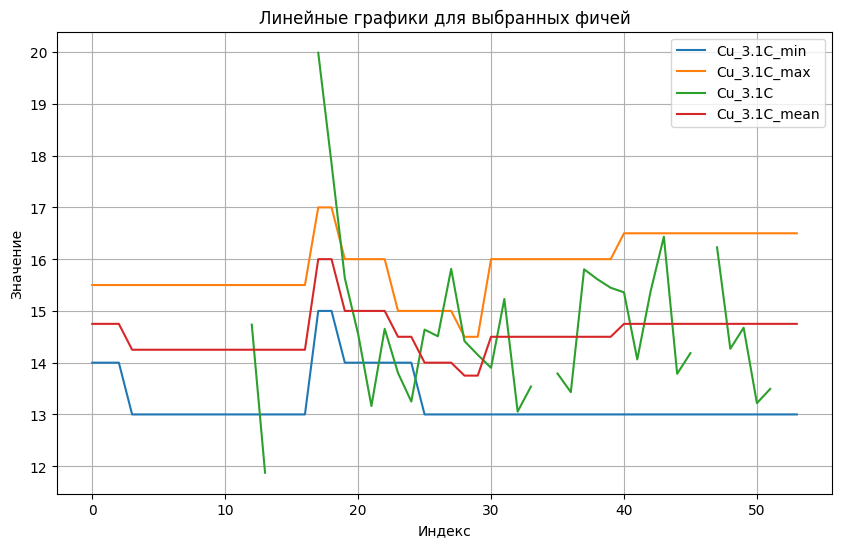

In [170]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Cu_{x}C_min'], label=f'Cu_{x}C_min')
plt.plot(summed_df[f'Cu_{x}C_max'], label=f'Cu_{x}C_max')
plt.plot(summed_df[f'Cu_{x}C'], label=f'Cu_{x}C')
plt.plot(summed_df[f'Cu_{x}C_mean'], label=f'Cu_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

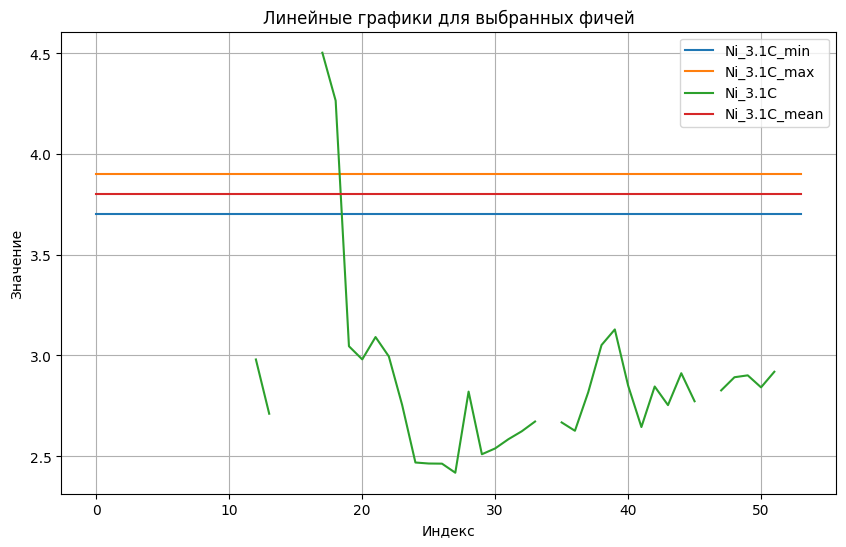

In [171]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C')
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

In [172]:
df = df.with_columns(((pl.col(f'Cu_{x}C_max')+pl.col(f'Cu_{x}C_min'))/2).alias(f'Cu_{x}C_mean'))
df = df.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
summed_df = df.to_pandas()

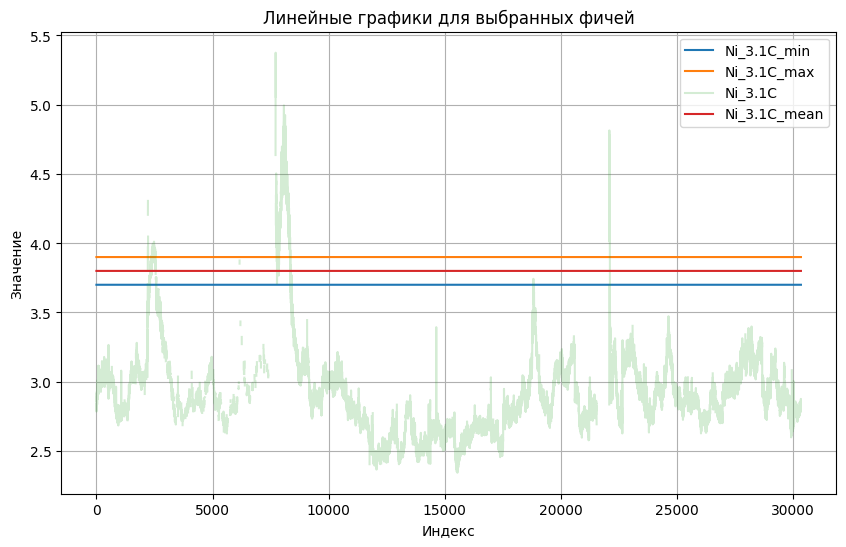

In [174]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C',alpha=0.2)
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

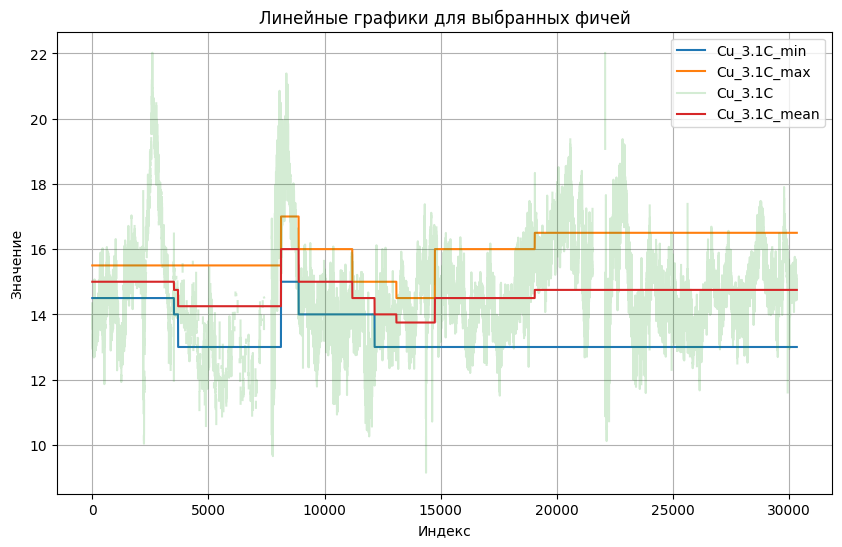

In [175]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Cu_{x}C_min'], label=f'Cu_{x}C_min')
plt.plot(summed_df[f'Cu_{x}C_max'], label=f'Cu_{x}C_max')
plt.plot(summed_df[f'Cu_{x}C'], label=f'Cu_{x}C',alpha=0.2)
plt.plot(summed_df[f'Cu_{x}C_mean'], label=f'Cu_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

## FM_3.2

## FM_4.1

Наиболее релевантные данные с переключения полей A с 0 на 1

In [209]:
x='4.2'

In [210]:
d = df.select([cs.contains(x)] + ['MEAS_DT'])
d.head()

Ni_4.1C,Ni_4.1C_max,Ni_4.1C_min,Ni_4.1T,Ni_4.1T_max,Ni_4.1T_min,FM_4.1_A,MEAS_DT
f64,f64,f64,f64,f64,f64,f64,str
4.1826,null,null,0.7136,null,null,null,"""2024-01-01 00:00:00"""
4.1037,4.7,4.5,0.7247,0.77,0.67,0.0,"""2024-01-01 00:15:00"""
4.1911,4.7,4.5,0.7069,0.77,0.67,0.0,"""2024-01-01 00:30:00"""
4.1268,4.7,4.5,0.7097,0.77,0.67,0.0,"""2024-01-01 00:45:00"""
4.1805,4.7,4.5,0.7155,0.77,0.67,0.0,"""2024-01-01 01:00:00"""


In [211]:
d[f'FM_{x}_A'].value_counts()

FM_4.1_A,count
f64,u32
null,1
1.0,20484
0.0,9851


In [212]:
d = d.with_columns(flag = pl.col(f'FM_{x}_A') - pl.col(f'FM_{x}_A').shift(-1))
d['flag'].unique()

flag
f64
null
-1.0
0.0
1.0


In [213]:
d=d.filter(pl.col('flag')==1)
d.head()

Ni_4.1C,Ni_4.1C_max,Ni_4.1C_min,Ni_4.1T,Ni_4.1T_max,Ni_4.1T_min,FM_4.1_A,MEAS_DT,flag
f64,f64,f64,f64,f64,f64,f64,str,f64
4.593,4.5,4.3,null,0.72,0.67,1.0,"""2024-01-10 13:00:00""",1.0
4.3403,4.5,4.3,0.7112,0.72,0.67,1.0,"""2024-01-11 16:15:00""",1.0
4.3464,4.5,4.3,0.6868,0.7,0.65,1.0,"""2024-01-16 12:45:00""",1.0
4.1411,4.3,4.1,0.6544,0.7,0.65,1.0,"""2024-01-21 01:30:00""",1.0
4.3247,4.2,4.0,0.7023,0.7,0.65,1.0,"""2024-01-23 11:30:00""",1.0


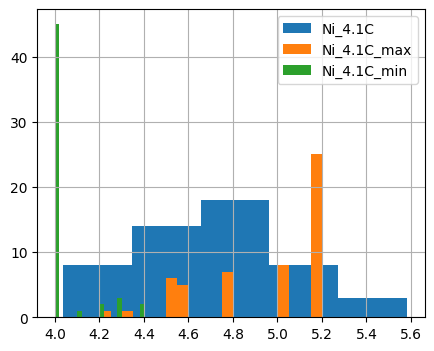

In [215]:
plt.figure(figsize=(5,4))
d[f'Ni_{x}C'].to_pandas().hist(bins=5, label=f'Ni_{x}C')
d[f'Ni_{x}C_max'].to_pandas().hist(bins=20, label=f'Ni_{x}C_max')
d[f'Ni_{x}C_min'].to_pandas().hist(bins=20, label=f'Ni_{x}C_min')
plt.legend()
plt.show()

In [216]:
d = d.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
d.head()

Ni_4.1C,Ni_4.1C_max,Ni_4.1C_min,Ni_4.1T,Ni_4.1T_max,Ni_4.1T_min,FM_4.1_A,MEAS_DT,flag,Ni_4.1C_mean
f64,f64,f64,f64,f64,f64,f64,str,f64,f64
4.593,4.5,4.3,null,0.72,0.67,1.0,"""2024-01-10 13:00:00""",1.0,4.4
4.3403,4.5,4.3,0.7112,0.72,0.67,1.0,"""2024-01-11 16:15:00""",1.0,4.4
4.3464,4.5,4.3,0.6868,0.7,0.65,1.0,"""2024-01-16 12:45:00""",1.0,4.4
4.1411,4.3,4.1,0.6544,0.7,0.65,1.0,"""2024-01-21 01:30:00""",1.0,4.2
4.3247,4.2,4.0,0.7023,0.7,0.65,1.0,"""2024-01-23 11:30:00""",1.0,4.1


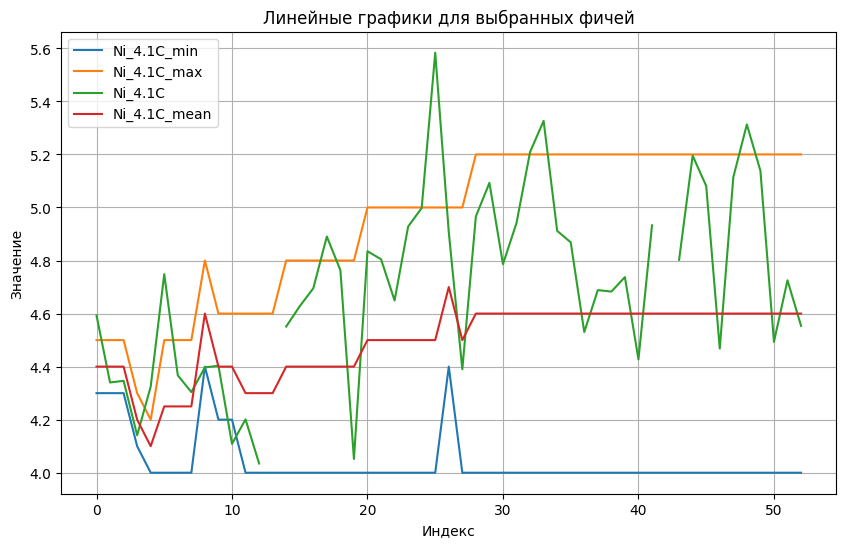

In [218]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C')
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

In [219]:

df = df.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
summed_df = df.to_pandas()

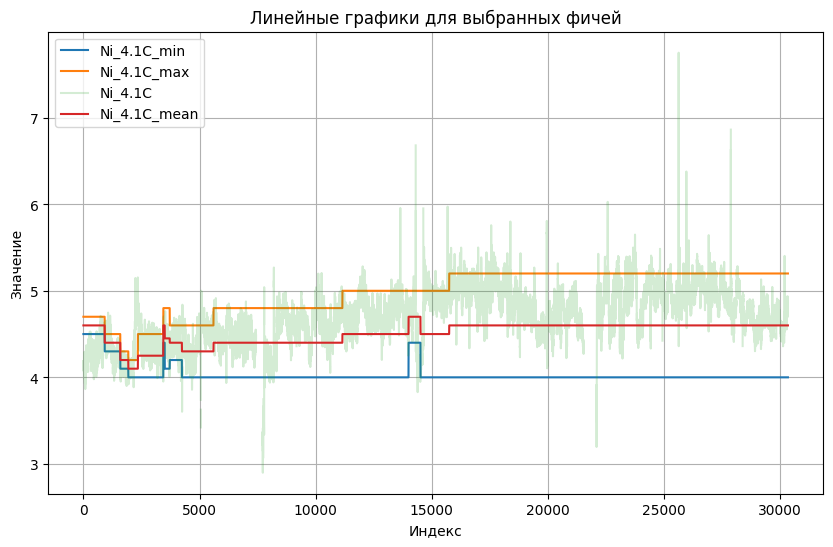

In [220]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C',alpha=0.2)
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

Наиболее релевантные данные с переключения полей A с 0 на 1

In [202]:
x='3.2'

In [203]:
d = df.select([cs.contains(x)] + ['MEAS_DT'])
d.head()

Cu_3.2C,Ni_3.2C,Cu_3.2T,Ni_3.2T,FM_3.2_A,Cu_3.2C_max,Cu_3.2C_min,Ni_3.2C_max,Ni_3.2C_min,Cu_3.2T_max,Cu_3.2T_min,Cu_3.2C_mean,Ni_3.2C_mean,MEAS_DT
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
14.9352,2.7402,1.731,4.4555,null,null,null,null,null,null,null,null,null,"""2024-01-01 00:00:00"""
14.6916,2.7704,1.8037,4.2734,0.0,14.0,12.0,3.7,3.5,1.2,1.0,13.0,3.6,"""2024-01-01 00:15:00"""
14.5276,2.7553,1.6489,4.4432,0.0,14.0,12.0,3.7,3.5,1.2,1.0,13.0,3.6,"""2024-01-01 00:30:00"""
14.1897,2.8553,1.3331,4.4488,0.0,14.0,12.0,3.7,3.5,1.2,1.0,13.0,3.6,"""2024-01-01 00:45:00"""
14.4848,2.7443,1.3668,4.4291,0.0,14.0,12.0,3.7,3.5,1.2,1.0,13.0,3.6,"""2024-01-01 01:00:00"""


In [204]:
d[f'FM_{x}_A'].value_counts()

FM_3.2_A,count
f64,u32
null,1
0.0,20287
1.0,10048


In [205]:
d = d.with_columns(flag = pl.col(f'FM_{x}_A') - pl.col(f'FM_{x}_A').shift(-1))
d['flag'].unique()

flag
f64
null
-1.0
0.0
1.0


In [206]:
d=d.filter(pl.col('flag')==1)
d.head()

Cu_3.2C,Ni_3.2C,Cu_3.2T,Ni_3.2T,FM_3.2_A,Cu_3.2C_max,Cu_3.2C_min,Ni_3.2C_max,Ni_3.2C_min,Cu_3.2T_max,Cu_3.2T_min,Cu_3.2C_mean,Ni_3.2C_mean,MEAS_DT,flag
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
null,null,1.3665,3.8527,1.0,14.0,12.0,3.7,3.5,1.2,1.0,13.0,3.6,"""2024-02-07 16:00:00""",1.0
null,null,1.4296,3.4488,1.0,15.5,13.0,3.7,3.5,1.2,1.0,14.25,3.6,"""2024-02-08 12:45:00""",1.0
null,null,1.3899,4.6509,1.0,15.5,13.0,3.7,3.5,1.4,1.0,14.25,3.6,"""2024-02-13 22:00:00""",1.0
null,null,1.3351,4.8541,1.0,15.5,13.0,3.7,3.5,1.4,1.0,14.25,3.6,"""2024-02-14 11:30:00""",1.0
null,null,1.5455,4.7505,1.0,15.5,13.0,3.7,3.5,1.4,1.0,14.25,3.6,"""2024-02-14 12:45:00""",1.0


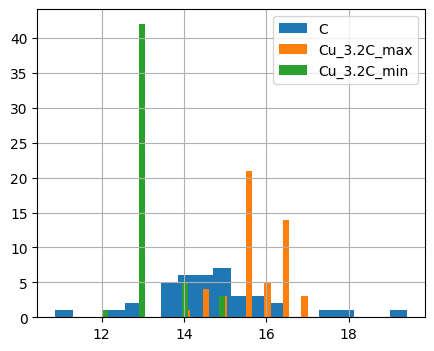

In [208]:
plt.figure(figsize=(5,4))
d[f'Cu_{x}C'].to_pandas().hist(bins=20, label='C')
d[f'Cu_{x}C_max'].to_pandas().hist(bins=20, label=f'Cu_{x}C_max')
d[f'Cu_{x}C_min'].to_pandas().hist(bins=20, label=f'Cu_{x}C_min')
plt.legend()
plt.show()

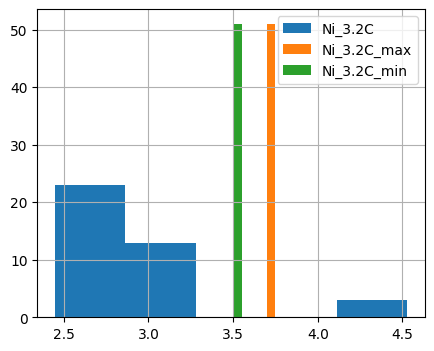

In [199]:
plt.figure(figsize=(5,4))
d[f'Ni_{x}C'].to_pandas().hist(bins=5, label=f'Ni_{x}C')
d[f'Ni_{x}C_max'].to_pandas().hist(bins=20, label=f'Ni_{x}C_max')
d[f'Ni_{x}C_min'].to_pandas().hist(bins=20, label=f'Ni_{x}C_min')
plt.legend()
plt.show()

In [200]:
d = d.with_columns(((pl.col(f'Cu_{x}C_max')+pl.col(f'Cu_{x}C_min'))/2).alias(f'Cu_{x}C_mean'))
d = d.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
d.head()

Cu_3.2C,Ni_3.2C,Cu_3.2T,Ni_3.2T,FM_3.2_A,Cu_3.2C_max,Cu_3.2C_min,Ni_3.2C_max,Ni_3.2C_min,Cu_3.2T_max,Cu_3.2T_min,Cu_3.2C_mean,Ni_3.2C_mean,MEAS_DT,flag
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
null,null,1.3665,3.8527,1.0,14.0,12.0,3.7,3.5,1.2,1.0,13.0,3.6,"""2024-02-07 16:00:00""",1.0
null,null,1.4296,3.4488,1.0,15.5,13.0,3.7,3.5,1.2,1.0,14.25,3.6,"""2024-02-08 12:45:00""",1.0
null,null,1.3899,4.6509,1.0,15.5,13.0,3.7,3.5,1.4,1.0,14.25,3.6,"""2024-02-13 22:00:00""",1.0
null,null,1.3351,4.8541,1.0,15.5,13.0,3.7,3.5,1.4,1.0,14.25,3.6,"""2024-02-14 11:30:00""",1.0
null,null,1.5455,4.7505,1.0,15.5,13.0,3.7,3.5,1.4,1.0,14.25,3.6,"""2024-02-14 12:45:00""",1.0


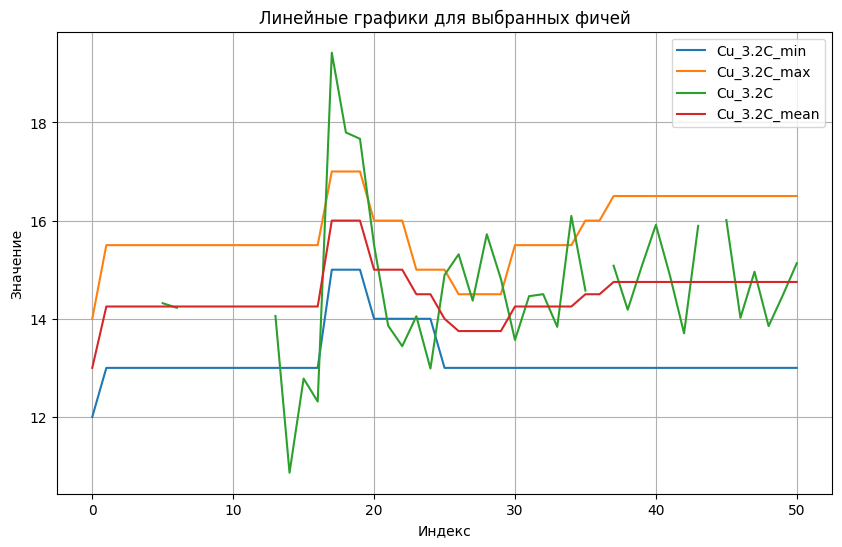

In [201]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Cu_{x}C_min'], label=f'Cu_{x}C_min')
plt.plot(summed_df[f'Cu_{x}C_max'], label=f'Cu_{x}C_max')
plt.plot(summed_df[f'Cu_{x}C'], label=f'Cu_{x}C')
plt.plot(summed_df[f'Cu_{x}C_mean'], label=f'Cu_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

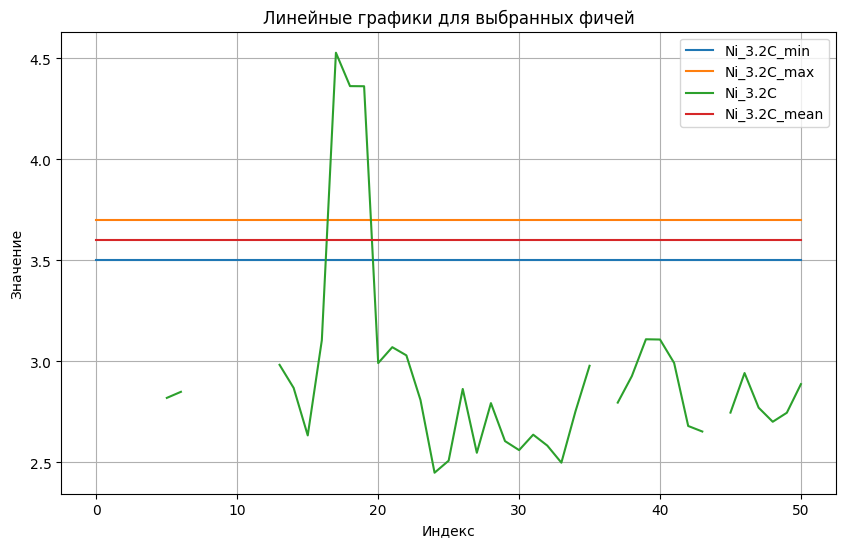

In [186]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C')
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

In [187]:
df = df.with_columns(((pl.col(f'Cu_{x}C_max')+pl.col(f'Cu_{x}C_min'))/2).alias(f'Cu_{x}C_mean'))
df = df.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
summed_df = df.to_pandas()

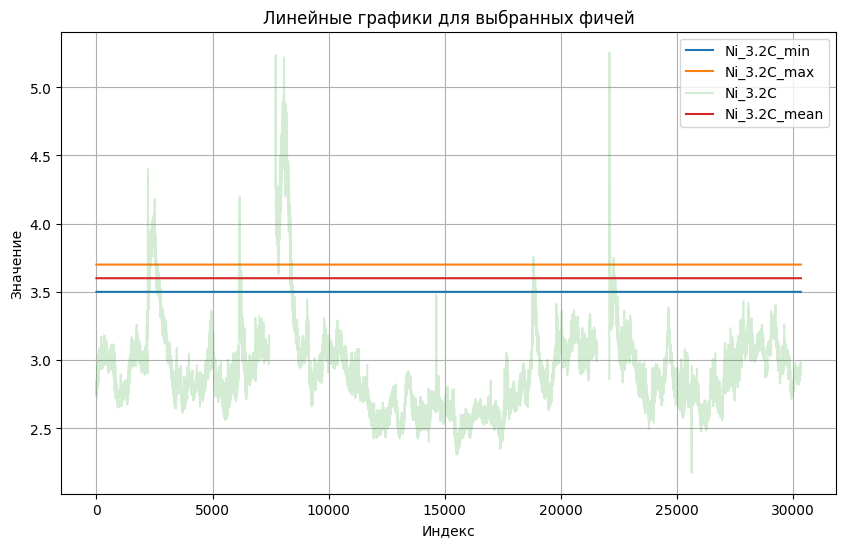

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C',alpha=0.2)
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

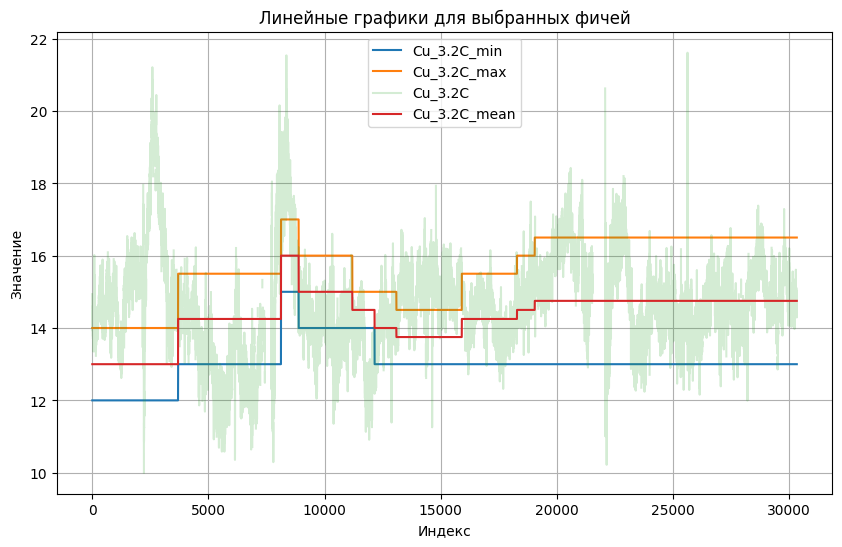

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Cu_{x}C_min'], label=f'Cu_{x}C_min')
plt.plot(summed_df[f'Cu_{x}C_max'], label=f'Cu_{x}C_max')
plt.plot(summed_df[f'Cu_{x}C'], label=f'Cu_{x}C',alpha=0.2)
plt.plot(summed_df[f'Cu_{x}C_mean'], label=f'Cu_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

## FM_4.2

In [221]:
x='4.2'

In [224]:
d = df.select([cs.contains(x)] + ['MEAS_DT'])
d.head()

Ni_4.2C,Ni_4.2C_max,Ni_4.2C_min,Ni_4.2T,Ni_4.2T_max,Ni_4.2T_min,FM_4.2_A,MEAS_DT
f64,f64,f64,f64,f64,f64,f64,str
3.8121,null,null,0.7602,null,null,null,"""2024-01-01 00:00:00"""
3.7383,4.7,4.2,0.7585,0.75,0.68,0.0,"""2024-01-01 00:15:00"""
3.7132,4.7,4.2,0.7613,0.75,0.68,0.0,"""2024-01-01 00:30:00"""
3.7086,4.7,4.2,0.7412,0.75,0.68,0.0,"""2024-01-01 00:45:00"""
3.7558,4.7,4.2,0.755,0.75,0.68,0.0,"""2024-01-01 01:00:00"""


In [225]:
d[f'FM_{x}_A'].value_counts()

FM_4.2_A,count
f64,u32
0.0,11207
1.0,19128
null,1


In [226]:
d = d.with_columns(flag = pl.col(f'FM_{x}_A') - pl.col(f'FM_{x}_A').shift(-1))
d['flag'].unique()

flag
f64
null
-1.0
0.0
1.0


In [227]:
d=d.filter(pl.col('flag')==1)
d.head()

Ni_4.2C,Ni_4.2C_max,Ni_4.2C_min,Ni_4.2T,Ni_4.2T_max,Ni_4.2T_min,FM_4.2_A,MEAS_DT,flag
f64,f64,f64,f64,f64,f64,f64,str,f64
4.703,4.5,4.3,0.7352,0.73,0.67,1.0,"""2024-01-10 13:00:00""",1.0
null,4.5,4.3,null,0.72,0.67,1.0,"""2024-01-11 16:15:00""",1.0
4.6001,4.5,4.3,0.6952,0.7,0.65,1.0,"""2024-01-16 12:45:00""",1.0
4.2347,4.5,4.1,0.7032,0.7,0.65,1.0,"""2024-01-21 02:00:00""",1.0
null,4.3,4.0,null,0.7,0.65,1.0,"""2024-01-22 04:30:00""",1.0


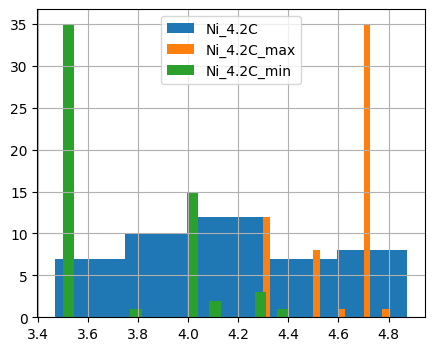

In [228]:
plt.figure(figsize=(5,4))
d[f'Ni_{x}C'].to_pandas().hist(bins=5, label=f'Ni_{x}C')
d[f'Ni_{x}C_max'].to_pandas().hist(bins=20, label=f'Ni_{x}C_max')
d[f'Ni_{x}C_min'].to_pandas().hist(bins=20, label=f'Ni_{x}C_min')
plt.legend()
plt.show()

In [229]:
d = d.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
d.head()

Ni_4.2C,Ni_4.2C_max,Ni_4.2C_min,Ni_4.2T,Ni_4.2T_max,Ni_4.2T_min,FM_4.2_A,MEAS_DT,flag,Ni_4.2C_mean
f64,f64,f64,f64,f64,f64,f64,str,f64,f64
4.703,4.5,4.3,0.7352,0.73,0.67,1.0,"""2024-01-10 13:00:00""",1.0,4.4
null,4.5,4.3,null,0.72,0.67,1.0,"""2024-01-11 16:15:00""",1.0,4.4
4.6001,4.5,4.3,0.6952,0.7,0.65,1.0,"""2024-01-16 12:45:00""",1.0,4.4
4.2347,4.5,4.1,0.7032,0.7,0.65,1.0,"""2024-01-21 02:00:00""",1.0,4.3
null,4.3,4.0,null,0.7,0.65,1.0,"""2024-01-22 04:30:00""",1.0,4.15


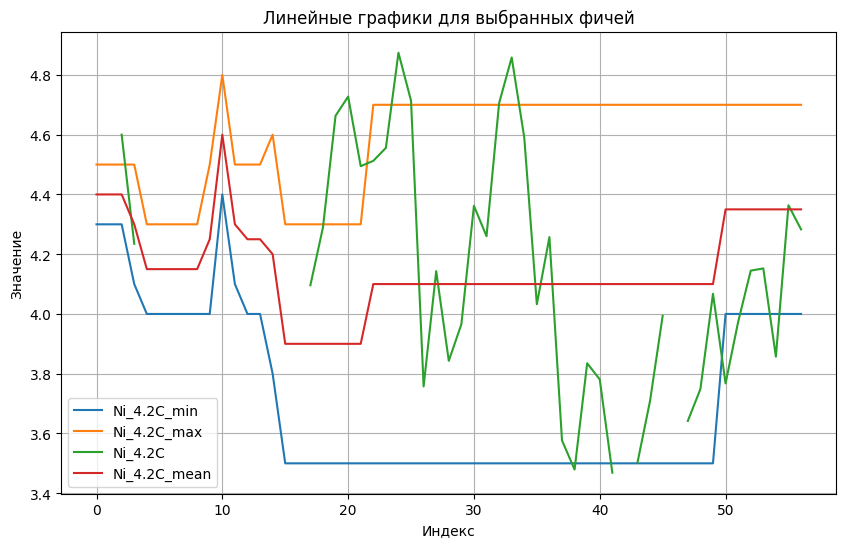

In [230]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C')
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

In [231]:
df = df.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
summed_df = df.to_pandas()

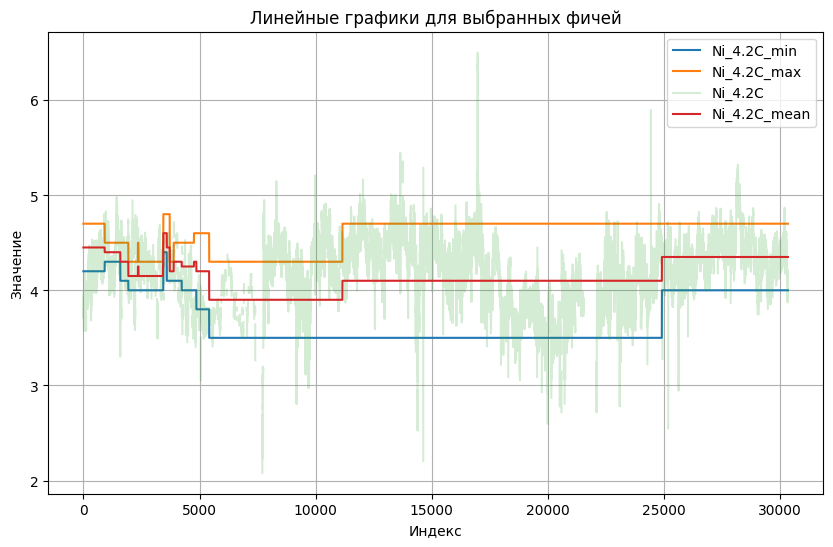

In [232]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C',alpha=0.2)
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

## FM_5.1

In [233]:
x='5.1'

In [234]:
d = df.select([cs.contains(x)] + ['MEAS_DT'])
d.head()

Ni_5.1C,Ni_5.1C_max,Ni_5.1C_min,Ni_5.1T,Ni_5.1T_max,Ni_5.1T_min,FM_5.1_A,MEAS_DT
f64,f64,f64,f64,f64,f64,f64,str
6.21,null,null,0.7943,null,null,null,"""2024-01-01 00:00:00"""
6.33,6.5,6.3,0.8009,0.75,0.68,0.0,"""2024-01-01 00:15:00"""
6.2619,6.5,6.3,0.7829,0.75,0.68,0.0,"""2024-01-01 00:30:00"""
6.0307,6.5,6.3,0.7576,0.75,0.68,0.0,"""2024-01-01 00:45:00"""
6.0333,6.5,6.3,0.7486,0.75,0.68,0.0,"""2024-01-01 01:00:00"""


In [235]:
d[f'FM_{x}_A'].value_counts()

FM_5.1_A,count
f64,u32
1.0,19948
0.0,10387
null,1


In [236]:
d = d.with_columns(flag = pl.col(f'FM_{x}_A') - pl.col(f'FM_{x}_A').shift(-1))
d['flag'].unique()

flag
f64
null
-1.0
0.0
1.0


In [237]:
d=d.filter(pl.col('flag')==1)
d.head()

Ni_5.1C,Ni_5.1C_max,Ni_5.1C_min,Ni_5.1T,Ni_5.1T_max,Ni_5.1T_min,FM_5.1_A,MEAS_DT,flag
f64,f64,f64,f64,f64,f64,f64,str,f64
6.4932,6.5,6.3,0.8011,0.73,0.68,1.0,"""2024-01-12 09:30:00""",1.0
6.5131,6.5,6.2,0.6985,0.7,0.67,1.0,"""2024-01-16 11:15:00""",1.0
6.5792,6.5,6.2,0.7149,0.7,0.67,1.0,"""2024-01-20 10:30:00""",1.0
6.1195,6.5,6.2,0.6884,0.7,0.67,1.0,"""2024-01-22 11:15:00""",1.0
6.4925,6.5,6.2,0.725,0.7,0.67,1.0,"""2024-01-23 11:30:00""",1.0


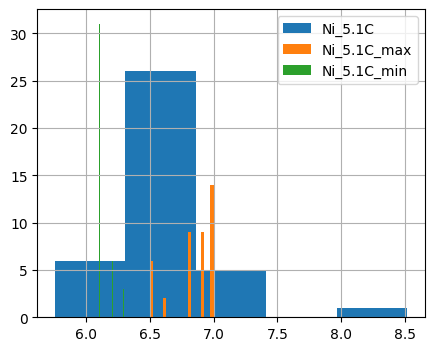

In [238]:
plt.figure(figsize=(5,4))
d[f'Ni_{x}C'].to_pandas().hist(bins=5, label=f'Ni_{x}C')
d[f'Ni_{x}C_max'].to_pandas().hist(bins=20, label=f'Ni_{x}C_max')
d[f'Ni_{x}C_min'].to_pandas().hist(bins=20, label=f'Ni_{x}C_min')
plt.legend()
plt.show()

In [239]:
d = d.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
d.head()

Ni_5.1C,Ni_5.1C_max,Ni_5.1C_min,Ni_5.1T,Ni_5.1T_max,Ni_5.1T_min,FM_5.1_A,MEAS_DT,flag,Ni_5.1C_mean
f64,f64,f64,f64,f64,f64,f64,str,f64,f64
6.4932,6.5,6.3,0.8011,0.73,0.68,1.0,"""2024-01-12 09:30:00""",1.0,6.4
6.5131,6.5,6.2,0.6985,0.7,0.67,1.0,"""2024-01-16 11:15:00""",1.0,6.35
6.5792,6.5,6.2,0.7149,0.7,0.67,1.0,"""2024-01-20 10:30:00""",1.0,6.35
6.1195,6.5,6.2,0.6884,0.7,0.67,1.0,"""2024-01-22 11:15:00""",1.0,6.35
6.4925,6.5,6.2,0.725,0.7,0.67,1.0,"""2024-01-23 11:30:00""",1.0,6.35


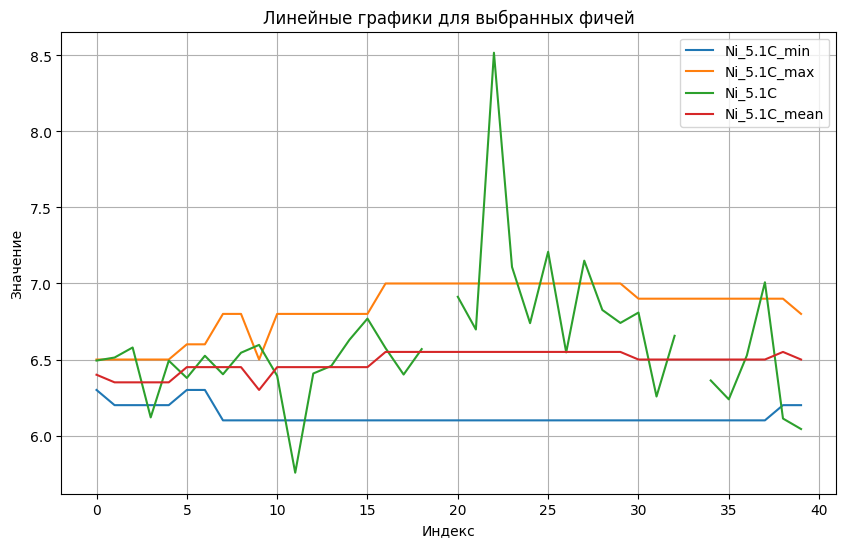

In [240]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C')
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

In [241]:
df = df.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
summed_df = df.to_pandas()

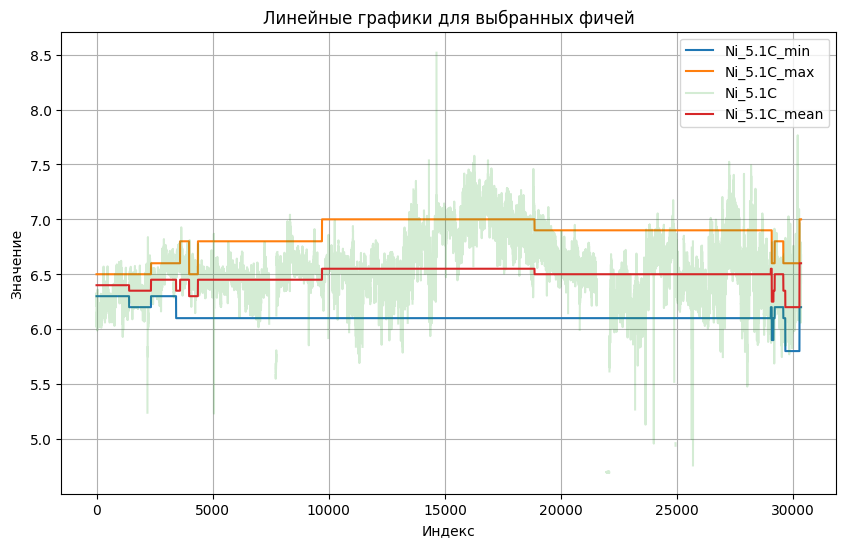

In [242]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C',alpha=0.2)
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

## FM_5.2

Наиболее релевантные данные с переключения полей A с 0 на 1

In [243]:
x='5.2'

In [245]:
d = df.select([cs.contains(x)] + ['MEAS_DT'])
d.head()

Ni_5.2C,Ni_5.2C_max,Ni_5.2C_min,Ni_5.2T,Ni_5.2T_max,Ni_5.2T_min,FM_5.2_A,MEAS_DT
f64,f64,f64,f64,f64,f64,f64,str
6.7906,null,null,0.7694,null,null,null,"""2024-01-01 00:00:00"""
6.642,6.5,6.3,0.7743,0.75,0.65,0.0,"""2024-01-01 00:15:00"""
6.5325,6.5,6.3,0.7582,0.75,0.65,0.0,"""2024-01-01 00:30:00"""
6.7853,6.5,6.3,0.7656,0.75,0.65,0.0,"""2024-01-01 00:45:00"""
6.7513,6.5,6.3,0.7583,0.75,0.65,0.0,"""2024-01-01 01:00:00"""


In [246]:
d[f'FM_{x}_A'].value_counts()

FM_5.2_A,count
f64,u32
1.0,20262
0.0,10073
null,1


In [247]:
d = d.with_columns(flag = pl.col(f'FM_{x}_A') - pl.col(f'FM_{x}_A').shift(-1))
d['flag'].unique()

flag
f64
null
-1.0
0.0
1.0


In [248]:
d=d.filter(pl.col('flag')==1)
d.head()

Ni_5.2C,Ni_5.2C_max,Ni_5.2C_min,Ni_5.2T,Ni_5.2T_max,Ni_5.2T_min,FM_5.2_A,MEAS_DT,flag
f64,f64,f64,f64,f64,f64,f64,str,f64
6.6541,6.5,6.3,0.8122,0.77,0.65,1.0,"""2024-01-12 09:30:00""",1.0
7.0375,6.5,6.3,null,0.72,0.65,1.0,"""2024-01-16 11:00:00""",1.0
6.291,6.5,6.3,0.6835,0.72,0.65,1.0,"""2024-01-20 10:15:00""",1.0
6.637,6.5,6.3,0.7145,0.72,0.65,1.0,"""2024-01-23 11:15:00""",1.0
6.6892,6.4,6.0,0.7044,0.7,0.65,1.0,"""2024-01-30 11:30:00""",1.0


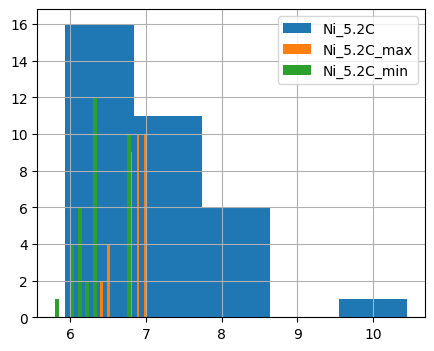

In [249]:
plt.figure(figsize=(5,4))
d[f'Ni_{x}C'].to_pandas().hist(bins=5, label=f'Ni_{x}C')
d[f'Ni_{x}C_max'].to_pandas().hist(bins=20, label=f'Ni_{x}C_max')
d[f'Ni_{x}C_min'].to_pandas().hist(bins=20, label=f'Ni_{x}C_min')
plt.legend()
plt.show()

In [250]:
d = d.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
d.head()

Ni_5.2C,Ni_5.2C_max,Ni_5.2C_min,Ni_5.2T,Ni_5.2T_max,Ni_5.2T_min,FM_5.2_A,MEAS_DT,flag,Ni_5.2C_mean
f64,f64,f64,f64,f64,f64,f64,str,f64,f64
6.6541,6.5,6.3,0.8122,0.77,0.65,1.0,"""2024-01-12 09:30:00""",1.0,6.4
7.0375,6.5,6.3,null,0.72,0.65,1.0,"""2024-01-16 11:00:00""",1.0,6.4
6.291,6.5,6.3,0.6835,0.72,0.65,1.0,"""2024-01-20 10:15:00""",1.0,6.4
6.637,6.5,6.3,0.7145,0.72,0.65,1.0,"""2024-01-23 11:15:00""",1.0,6.4
6.6892,6.4,6.0,0.7044,0.7,0.65,1.0,"""2024-01-30 11:30:00""",1.0,6.2


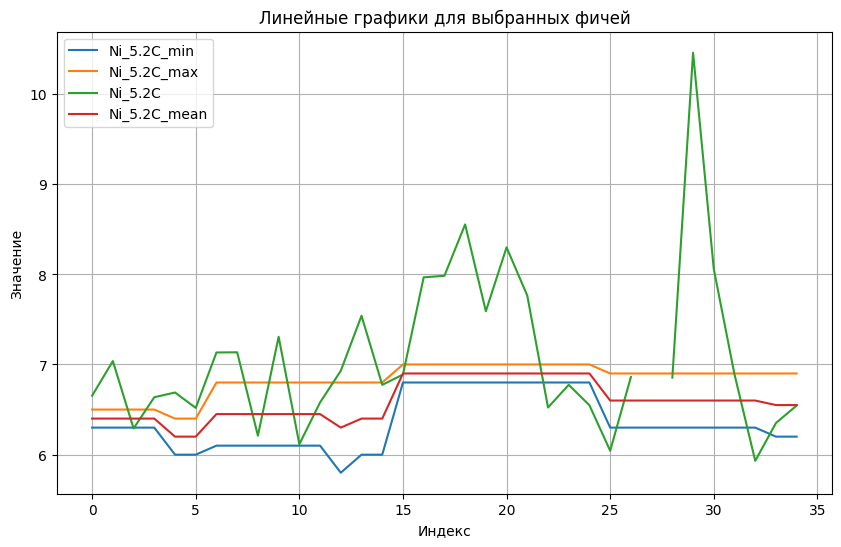

In [251]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C')
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

In [252]:
df = df.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
summed_df = df.to_pandas()

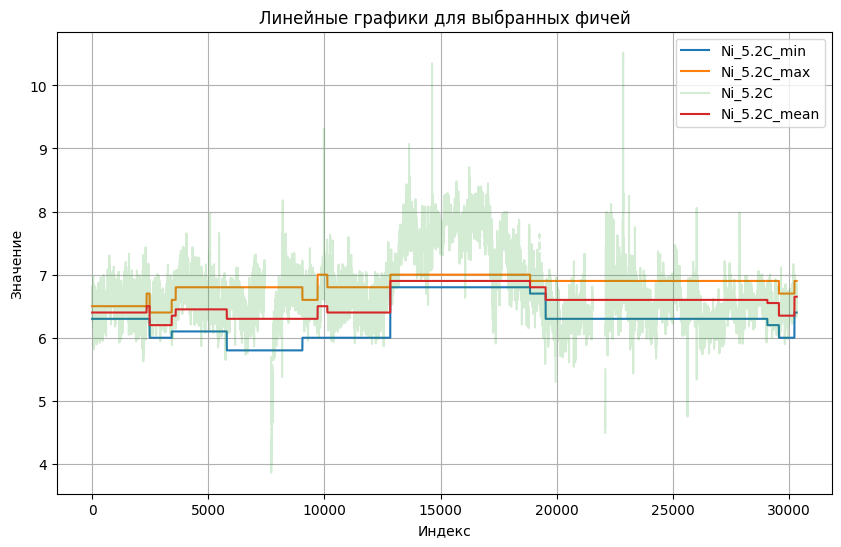

In [253]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C',alpha=0.2)
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

## FM_6.1

Наиболее релевантные данные с переключения полей A с 0 на 1

In [254]:
x='6.1'

In [255]:
d = df.select([cs.contains(x)] + ['MEAS_DT'])
d.head()

Ni_6.1C,Ni_6.1C_max,Ni_6.1C_min,Ni_6.1T,Ni_6.1T_max,Ni_6.1T_min,FM_6.1_A,MEAS_DT
f64,f64,f64,f64,f64,f64,f64,str
9.0939,null,null,1.3531,null,null,null,"""2024-01-01 00:00:00"""
9.0422,9.5,9.0,1.3338,1.45,1.4,0.0,"""2024-01-01 00:15:00"""
8.9666,9.5,9.0,1.2827,1.45,1.4,0.0,"""2024-01-01 00:30:00"""
8.9439,9.5,9.0,1.3131,1.45,1.4,0.0,"""2024-01-01 00:45:00"""
9.1168,9.5,9.0,1.3491,1.45,1.4,0.0,"""2024-01-01 01:00:00"""


In [256]:
d[f'FM_{x}_A'].value_counts()

FM_6.1_A,count
f64,u32
0.0,23960
null,1
1.0,6375


In [257]:
d = d.with_columns(flag = pl.col(f'FM_{x}_A') - pl.col(f'FM_{x}_A').shift(-1))
d['flag'].unique()

flag
f64
null
-1.0
0.0
1.0


In [258]:
d=d.filter(pl.col('flag')==1)
d.head()

Ni_6.1C,Ni_6.1C_max,Ni_6.1C_min,Ni_6.1T,Ni_6.1T_max,Ni_6.1T_min,FM_6.1_A,MEAS_DT,flag
f64,f64,f64,f64,f64,f64,f64,str,f64
9.7286,9.0,8.8,1.4254,1.5,1.4,1.0,"""2024-01-12 09:30:00""",1.0
8.7881,9.0,8.8,1.1494,1.1,1.0,1.0,"""2024-01-16 14:30:00""",1.0
8.4908,9.0,8.8,1.131,1.15,1.0,1.0,"""2024-01-16 18:30:00""",1.0
8.8284,9.0,8.8,1.1285,1.2,1.0,1.0,"""2024-01-17 11:00:00""",1.0
9.2221,9.0,8.8,1.2724,1.2,1.0,1.0,"""2024-01-18 15:15:00""",1.0


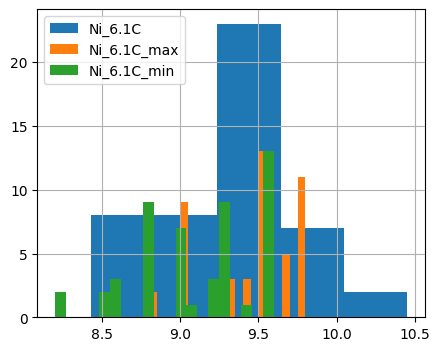

In [259]:
plt.figure(figsize=(5,4))
d[f'Ni_{x}C'].to_pandas().hist(bins=5, label=f'Ni_{x}C')
d[f'Ni_{x}C_max'].to_pandas().hist(bins=20, label=f'Ni_{x}C_max')
d[f'Ni_{x}C_min'].to_pandas().hist(bins=20, label=f'Ni_{x}C_min')
plt.legend()
plt.show()

In [260]:
d = d.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
d.head()

Ni_6.1C,Ni_6.1C_max,Ni_6.1C_min,Ni_6.1T,Ni_6.1T_max,Ni_6.1T_min,FM_6.1_A,MEAS_DT,flag,Ni_6.1C_mean
f64,f64,f64,f64,f64,f64,f64,str,f64,f64
9.7286,9.0,8.8,1.4254,1.5,1.4,1.0,"""2024-01-12 09:30:00""",1.0,8.9
8.7881,9.0,8.8,1.1494,1.1,1.0,1.0,"""2024-01-16 14:30:00""",1.0,8.9
8.4908,9.0,8.8,1.131,1.15,1.0,1.0,"""2024-01-16 18:30:00""",1.0,8.9
8.8284,9.0,8.8,1.1285,1.2,1.0,1.0,"""2024-01-17 11:00:00""",1.0,8.9
9.2221,9.0,8.8,1.2724,1.2,1.0,1.0,"""2024-01-18 15:15:00""",1.0,8.9


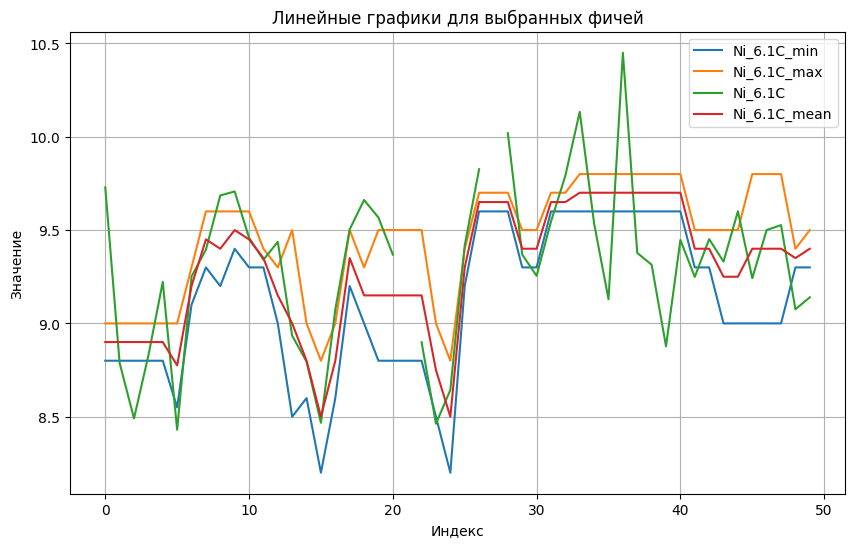

In [261]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C')
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

In [262]:
df = df.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
summed_df = df.to_pandas()

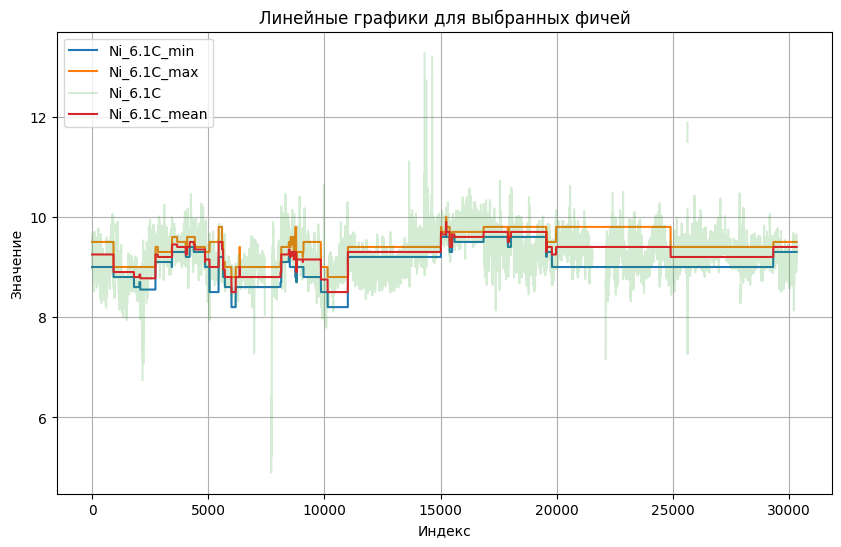

In [263]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C',alpha=0.2)
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

## FM_6.2

Наиболее релевантные данные с переключения полей A с 0 на 1

In [264]:
x='6.2'

In [265]:
d = df.select([cs.contains(x)] + ['MEAS_DT'])
d.head()

Ni_6.2C,Ni_6.2C_max,Ni_6.2C_min,Ni_6.2T,Ni_6.2T_max,Ni_6.2T_min,FM_6.2_A,MEAS_DT
f64,f64,f64,f64,f64,f64,f64,str
9.098,null,null,1.2932,null,null,null,"""2024-01-01 00:00:00"""
9.0137,9.5,9.0,1.3044,1.5,1.4,0.0,"""2024-01-01 00:15:00"""
8.9436,9.5,9.0,1.2598,1.5,1.4,0.0,"""2024-01-01 00:30:00"""
8.9196,9.5,9.0,1.3118,1.5,1.4,0.0,"""2024-01-01 00:45:00"""
9.0516,9.5,9.0,1.4647,1.5,1.4,0.0,"""2024-01-01 01:00:00"""


In [266]:
d[f'FM_{x}_A'].value_counts()

FM_6.2_A,count
f64,u32
1.0,6672
0.0,23663
null,1


In [267]:
d = d.with_columns(flag = pl.col(f'FM_{x}_A') - pl.col(f'FM_{x}_A').shift(-1))
d['flag'].unique()

flag
f64
null
-1.0
0.0
1.0


In [268]:
d=d.filter(pl.col('flag')==1)
d.head()

Ni_6.2C,Ni_6.2C_max,Ni_6.2C_min,Ni_6.2T,Ni_6.2T_max,Ni_6.2T_min,FM_6.2_A,MEAS_DT,flag
f64,f64,f64,f64,f64,f64,f64,str,f64
null,9.1,8.8,null,1.5,1.4,1.0,"""2024-01-12 09:15:00""",1.0
null,9.0,8.8,null,1.1,1.0,1.0,"""2024-01-16 14:30:00""",1.0
9.1858,9.0,8.8,1.071,1.1,1.0,1.0,"""2024-01-16 18:15:00""",1.0
9.5737,9.2,8.8,1.0304,1.15,1.0,1.0,"""2024-01-17 10:45:00""",1.0
9.3467,9.2,8.8,1.2087,1.15,1.0,1.0,"""2024-01-18 15:00:00""",1.0


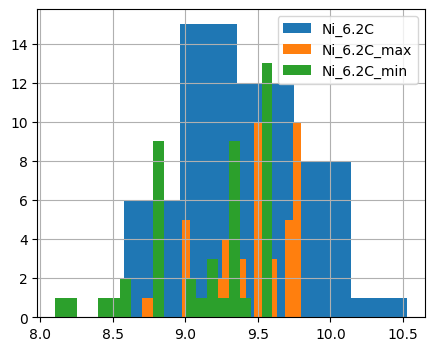

In [269]:
plt.figure(figsize=(5,4))
d[f'Ni_{x}C'].to_pandas().hist(bins=5, label=f'Ni_{x}C')
d[f'Ni_{x}C_max'].to_pandas().hist(bins=20, label=f'Ni_{x}C_max')
d[f'Ni_{x}C_min'].to_pandas().hist(bins=20, label=f'Ni_{x}C_min')
plt.legend()
plt.show()

In [270]:
d = d.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
d.head()

Ni_6.2C,Ni_6.2C_max,Ni_6.2C_min,Ni_6.2T,Ni_6.2T_max,Ni_6.2T_min,FM_6.2_A,MEAS_DT,flag,Ni_6.2C_mean
f64,f64,f64,f64,f64,f64,f64,str,f64,f64
null,9.1,8.8,null,1.5,1.4,1.0,"""2024-01-12 09:15:00""",1.0,8.95
null,9.0,8.8,null,1.1,1.0,1.0,"""2024-01-16 14:30:00""",1.0,8.9
9.1858,9.0,8.8,1.071,1.1,1.0,1.0,"""2024-01-16 18:15:00""",1.0,8.9
9.5737,9.2,8.8,1.0304,1.15,1.0,1.0,"""2024-01-17 10:45:00""",1.0,9.0
9.3467,9.2,8.8,1.2087,1.15,1.0,1.0,"""2024-01-18 15:00:00""",1.0,9.0


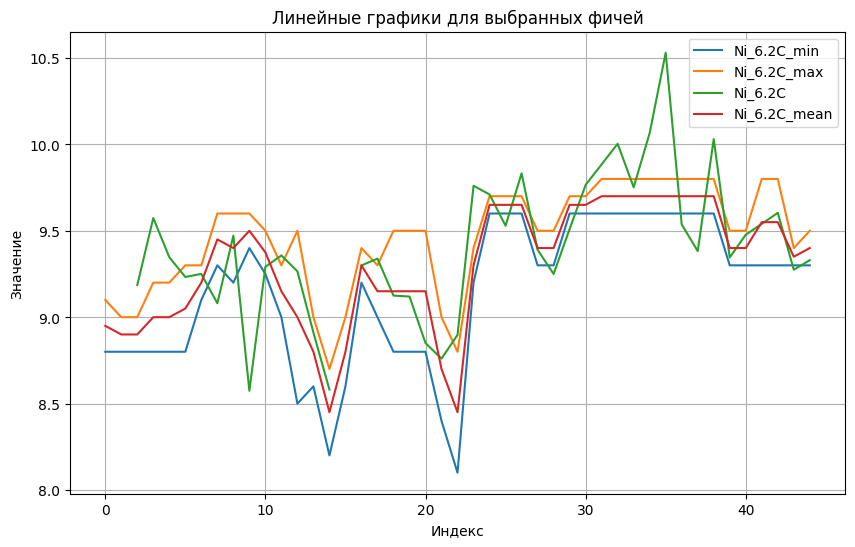

In [271]:
summed_df = d.to_pandas()
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C')
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

In [272]:
df = df.with_columns(((pl.col(f'Ni_{x}C_max')+pl.col(f'Ni_{x}C_min'))/2).alias(f'Ni_{x}C_mean'))
summed_df = df.to_pandas()

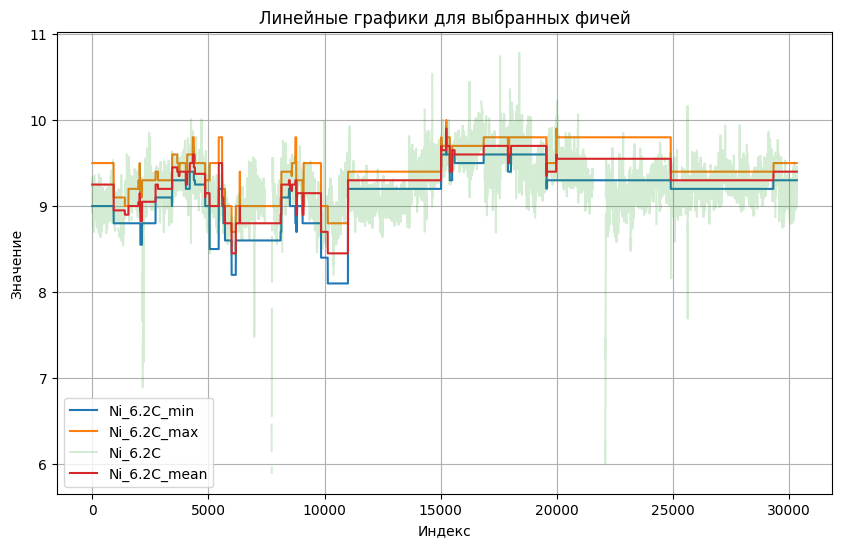

In [273]:
plt.figure(figsize=(10, 6))
plt.plot(summed_df[f'Ni_{x}C_min'], label=f'Ni_{x}C_min')
plt.plot(summed_df[f'Ni_{x}C_max'], label=f'Ni_{x}C_max')
plt.plot(summed_df[f'Ni_{x}C'], label=f'Ni_{x}C',alpha=0.2)
plt.plot(summed_df[f'Ni_{x}C_mean'], label=f'Ni_{x}C_mean')
plt.title('Линейные графики для выбранных фичей')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()

# Итоги по EDA

- На первоначальных этапах виден больший разброс значений и они чаще выходят за пределы мин/макс диапазонов по сравнию с поздними шагами
- Пороги мин/макс не симметричны и сдвинуты врпаво относительно медианного значения концентраций, видимо это связано с работой оптимизатора
- Моментов когда флаг автоуправления меняется с 0 на 1 слишком мало, хоть они наиболее точны, поэтому исключительно их применить для обучения модели не получится
- Показание порогов Ni_3.1C аномальные, они не менялись все время
- Изменение порогов на первых шагах смещает в туже сторону концентрацию, однако на более поздних этапах иногда ситуация обратная. Связано ли это с неправильной записью порогов или же обосновано технологически?
  

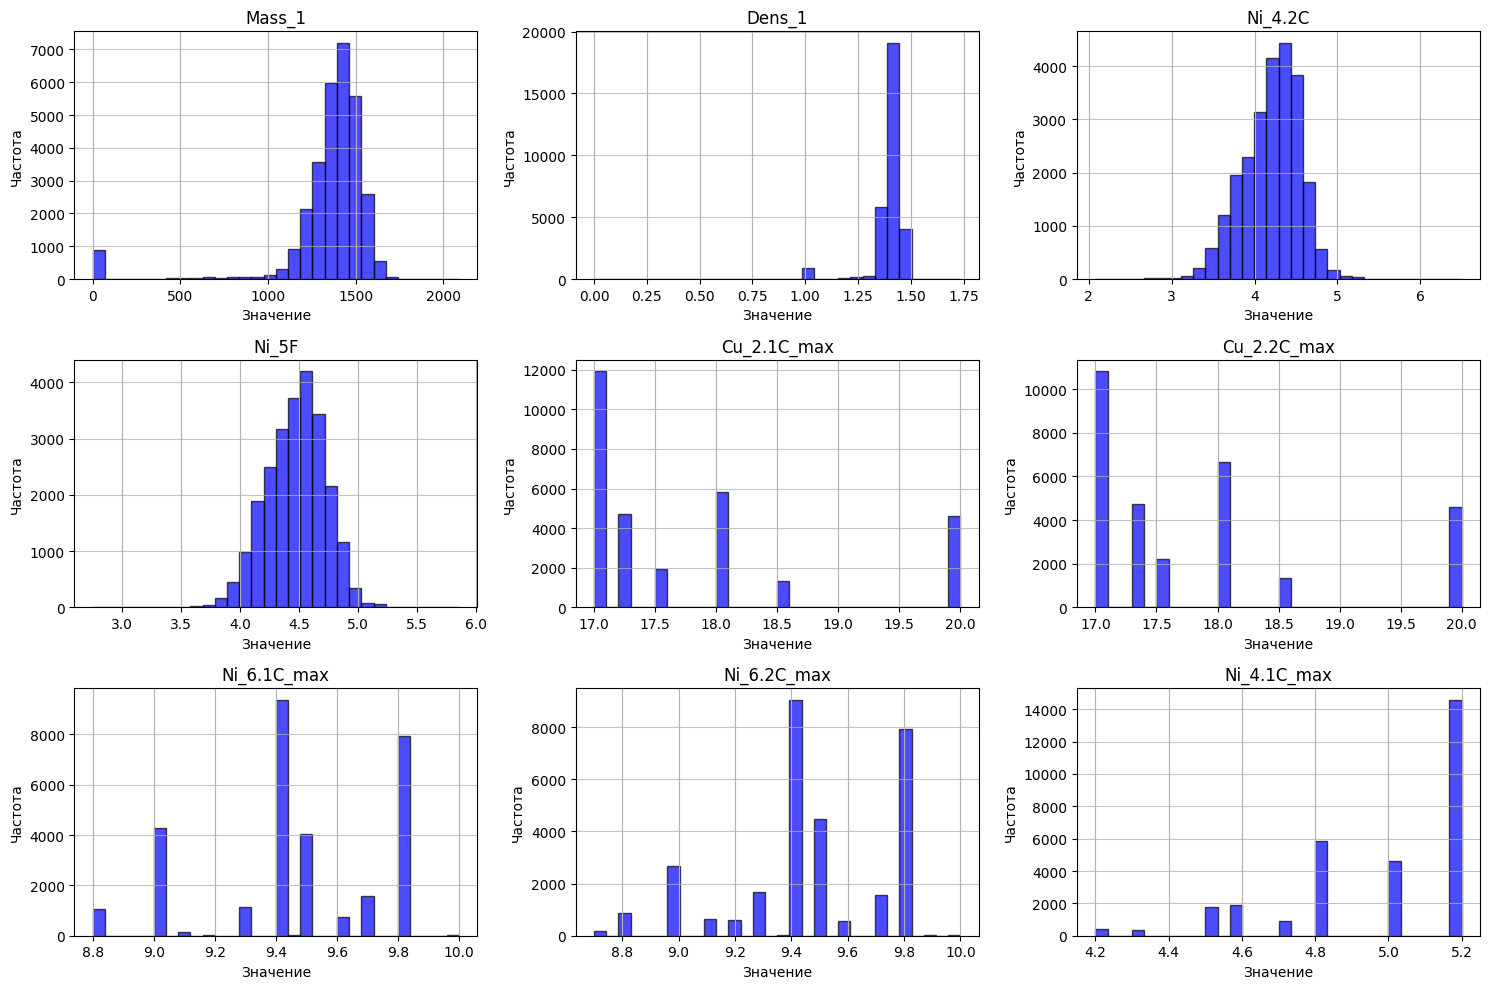

In [284]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # 3 строки и 3 столбца
axs = axs.flatten()  # Преобразуем 2D массив в 1D для удобства

# Названия признаков
titles = ['Mass_1', 'Dens_1', 'Ni_4.2C', 'Ni_5F', 'Cu_2.1C_max', 'Cu_2.2C_max', 'Ni_6.1C_max', 'Ni_6.2C_max', 'Ni_4.1C_max']

# Построение гистограмм
for i, column in enumerate(titles):
    summed_df[column].hist(ax=axs[i], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axs[i].set_title(column)
    axs[i].set_xlabel('Значение')
    axs[i].set_ylabel('Частота')
    axs[i].grid(axis='y', alpha=0.75)

# Настройка макета
plt.tight_layout()
plt.show()


In [274]:
import scipy.stats as stats

In [295]:
df.select(cs.contains('Ni_')).columns

['Ni_oreth',
 'Ni_4F',
 'Ni_4.1C',
 'Ni_4.1C_max',
 'Ni_4.1C_min',
 'Ni_4.1T',
 'Ni_4.1T_max',
 'Ni_4.1T_min',
 'Ni_4.2C',
 'Ni_4.2C_max',
 'Ni_4.2C_min',
 'Ni_4.2T',
 'Ni_4.2T_max',
 'Ni_4.2T_min',
 'Ni_5F',
 'Ni_5.1C',
 'Ni_5.1C_max',
 'Ni_5.1C_min',
 'Ni_5.1T',
 'Ni_5.1T_max',
 'Ni_5.1T_min',
 'Ni_5.2C',
 'Ni_5.2C_max',
 'Ni_5.2C_min',
 'Ni_5.2T',
 'Ni_5.2T_max',
 'Ni_5.2T_min',
 'Ni_6F',
 'Ni_6.1C',
 'Ni_6.1C_max',
 'Ni_6.1C_min',
 'Ni_6.1T',
 'Ni_6.1T_max',
 'Ni_6.1T_min',
 'Ni_6.2C',
 'Ni_6.2C_max',
 'Ni_6.2C_min',
 'Ni_6.2T',
 'Ni_6.2T_max',
 'Ni_6.2T_min',
 'Ni_resth',
 'Ni_1.1C',
 'Ni_1.2C',
 'Ni_2F',
 'Ni_2.1C',
 'Ni_2.2C',
 'Ni_3F',
 'Ni_3.1C',
 'Ni_3.2C',
 'Ni_2.1T',
 'Ni_2.2T',
 'Ni_3.1T',
 'Ni_3.2T',
 'Ni_1.1C_max',
 'Ni_1.1C_min',
 'Ni_1.1T_max',
 'Ni_1.1T_min',
 'Ni_1.2C_max',
 'Ni_1.2C_min',
 'Ni_1.2T_max',
 'Ni_1.2T_min',
 'Ni_3.1C_max',
 'Ni_3.1C_min',
 'Ni_3.2C_max',
 'Ni_3.2C_min',
 'Ni_rec',
 'Ni_1.1C_mean',
 'Ni_1.2C_mean',
 'Ni_3.1C_mean',
 'Ni_3.2C_mean',
 'Ni_

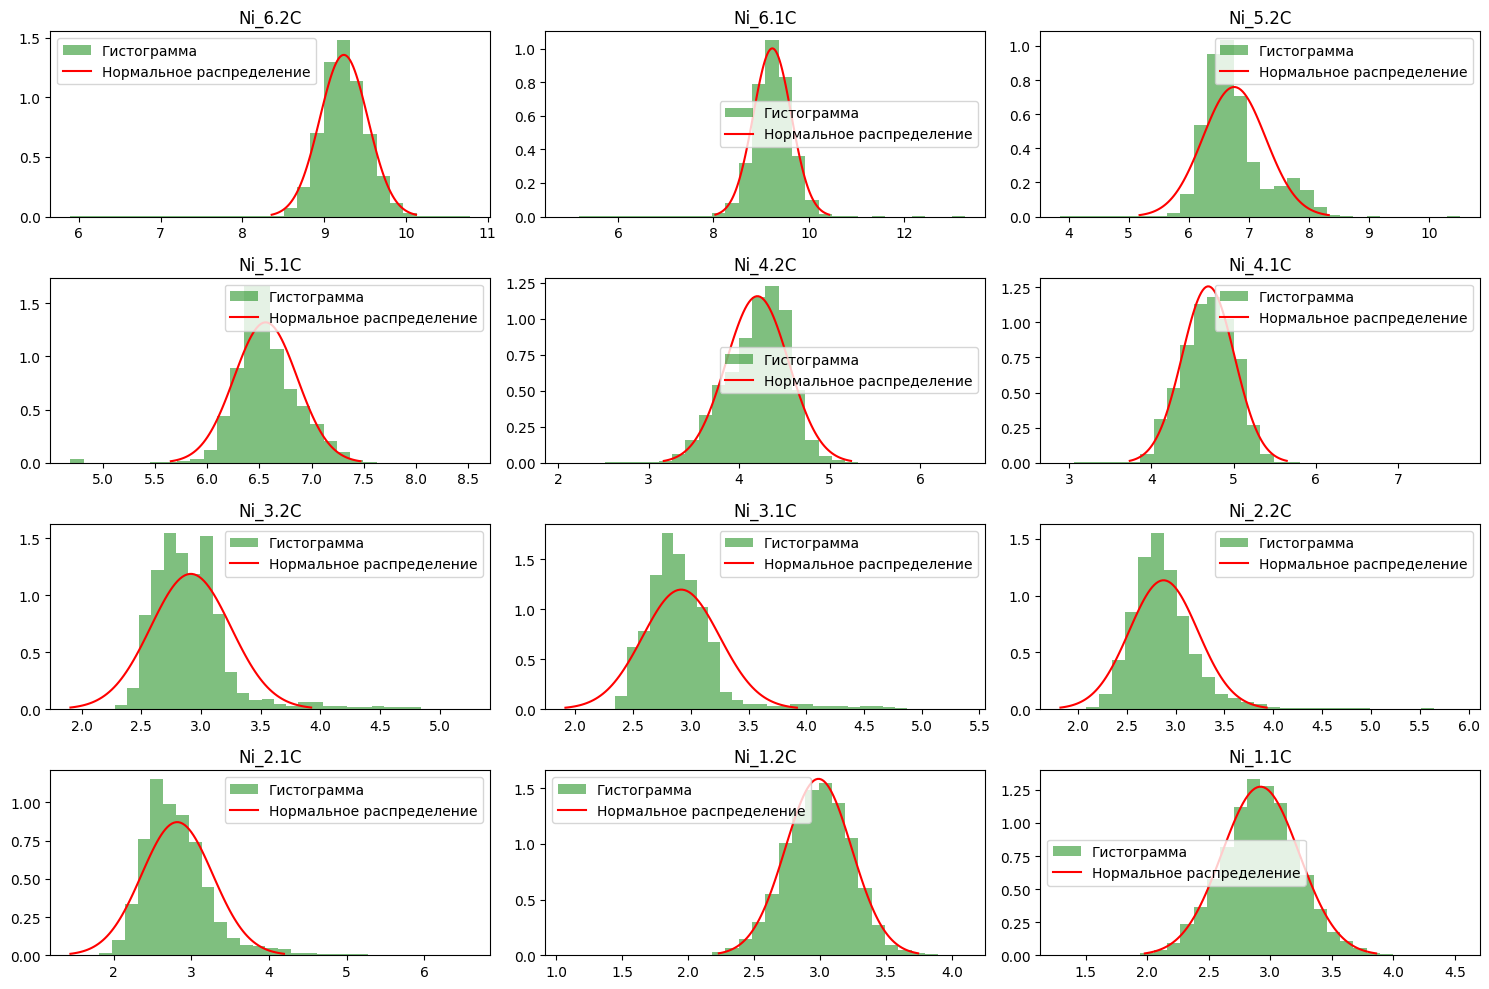

In [299]:
# Названия признаков
titles = ['Ni_6.2C', 'Ni_6.1C', 'Ni_5.2C', 'Ni_5.1C', 'Ni_4.2C', 'Ni_4.1C', 'Ni_3.2C', 'Ni_3.1C', 'Ni_2.2C','Ni_2.1C', 'Ni_1.2C', 'Ni_1.1C']
num_cols = 4
num_rows = math.ceil(len(titles) / num_cols)
fig, axs = plt.subplots(num_cols, num_rows, figsize=(15, 10))  # 3 строки и 3 столбца
axs = axs.flatten()  # Преобразуем 2D массив в 1D для удобства



# Построение гистограмм
for i, column in enumerate(titles):
    name = column
    mean = df[name].mean()
    std_dev = df[name].std()
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
    pdf = stats.norm.pdf(x, mean, std_dev)
    ax = axs[i]
    # Создаем график
    ax.hist(df[name].to_pandas(), bins=30, density=True, alpha=0.5, color='g', label='Гистограмма')
    ax.plot(x, pdf, 'r-', label='Нормальное распределение')
    ax.legend()
    ax.set_title(name)



# Настройка макета
plt.tight_layout()
plt.show()


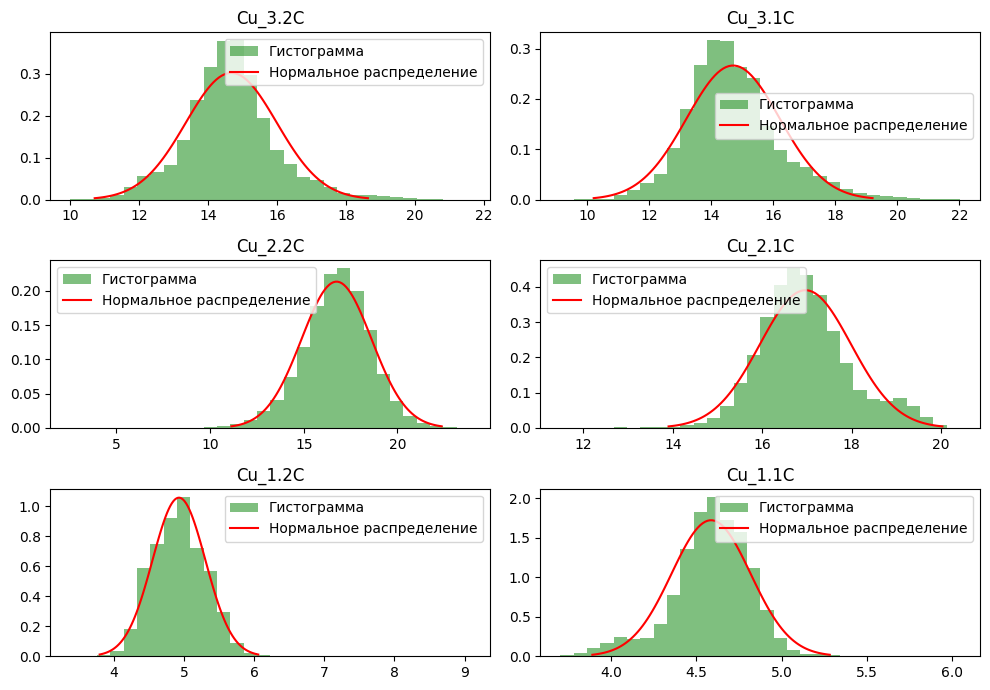

In [302]:
# Названия признаков
titles = ['Cu_3.2C', 'Cu_3.1C', 'Cu_2.2C','Cu_2.1C', 'Cu_1.2C', 'Cu_1.1C']
num_cols = 3
num_rows = math.ceil(len(titles) / num_cols)
fig, axs = plt.subplots(num_cols, num_rows, figsize=(10, 7))  # 3 строки и 3 столбца
axs = axs.flatten()  # Преобразуем 2D массив в 1D для удобства



# Построение гистограмм
for i, column in enumerate(titles):
    name = column
    mean = df[name].mean()
    std_dev = df[name].std()
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
    pdf = stats.norm.pdf(x, mean, std_dev)
    ax = axs[i]
    # Создаем график
    ax.hist(df[name].to_pandas(), bins=30, density=True, alpha=0.5, color='g', label='Гистограмма')
    ax.plot(x, pdf, 'r-', label='Нормальное распределение')
    ax.legend()
    ax.set_title(name)



# Настройка макета
plt.tight_layout()
plt.show()


# Итоги по EDA

- На первоначальных этапах виден больший разброс значений и они чаще выходят за пределы мин/макс диапазонов по сравнию с поздними шагами
- Пороги мин/макс не симметричны и сдвинуты врпаво относительно медианного значения концентраций, видимо это связано с работой оптимизатора
- Моментов когда флаг автоуправления меняется с 0 на 1 слишком мало, хоть они наиболее точны, поэтому исключительно их применить для обучения модели не получится
- Показание порогов Ni_3.1C аномальные, они не менялись все время
- Изменение порогов на первых шагах смещает в туже сторону концентрацию, однако на более поздних этапах иногда ситуация обратная. Связано ли это с неправильной записью порогов или же обосновано технологически?
  